<a href="https://colab.research.google.com/github/Anastassiya08/Predicting-the-Educational-and-Life-Trajectory-of-Young-People-Using-TrEP-Data/blob/main/TrEC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

In [2]:
!pip install pyreadstat

     |████████████████████████████████| 2.5MB 4.0MB/s 


In [3]:
!pip install category_encoders

     |████████████████████████████████| 81kB 2.7MB/s 


In [4]:
!pip install shap

     |████████████████████████████████| 358kB 3.9MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491629 sha256=8c2c92d9cfd0cf9a6f1aa21340ceed02487d3008f05b067e6c866ba961dc3704
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.api as smg
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import category_encoders as ce

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
import shap


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




# 1-4 waves data

In [ ]:
df1 = pd.read_spss("/content/drive/MyDrive/data_TrEC/NP1/panel2011_1_3en.sav")
df1 = df1.drop(columns=['panelid', 'aNum_ank', 'idschool', 'idclass', 'idteach', 'StIDSch', 'StIDStd', 'alongweight', 'ahouwgt_trac', 'acompweight', 'FAC1', 'FAC2', 'FAC3', 'FAC4', 'GRIT_int', 'GRIT_goal', 'ZGRIT_int', 'ZGRIT_goal', ])
df1 = df1.drop(df1[df1['idstud'].isna()].index)
df1.head()

aRegion     idstud  ...                                  aS22_b  aS22_c
0  Irkutsk oblast  4280124.0  ...  I orient him tow.highest poss.edu.lev.     NaN
1       Tatarstan  4190307.0  ...                                     NaN     NaN
2           Sakha  4150201.0  ...                                     NaN     NaN
3           Sakha  4150209.0  ...  I orient him tow.highest poss.edu.lev.     NaN
4           Sakha  4150218.0  ...                                     NaN     NaN

[5 rows x 196 columns]

In [ ]:
df2 = pd.read_spss("/content/drive/MyDrive/data_TrEC/NP2/NP 2wave EN.sav")
df2 = df2.drop(columns=['bQ_sposob', 'Q_id', 'idschool', 'bQ_kint', 'bQ_date', 'bQ_month', 'blongweight', 'bhouwgt_norm', 'houwgt', 'bcompweight', 'Reg_sposob'])
df2 = df2.drop(df2[df2['ParticipNP2'] == 0].index)
df2.head()

bQ_reg  ...                                  Rep_reason_if_not
0  Republic of North Ossetia (Alania)  ...                                  6 Other (specify)
2  Republic of North Ossetia (Alania)  ...                                                 0,
3  Republic of North Ossetia (Alania)  ...                                                 0,
4                  Kabardino-Balkaria  ...  4 Respondent is out of the geographical area o...
5  Republic of North Ossetia (Alania)  ...                                      1 No any info

[5 rows x 406 columns]

In [ ]:
df3 = pd.read_spss("/content/drive/MyDrive/data_TrEC/NP3/NP 3wave EN_UPD_2016.02.16.sav")
df3 = df3.drop(columns=['Q_id', 'cQ_kreg', 'cQ_nank', 'cQ_kint', 'cQ_date', 'cQ_month', 'cQ_st_hour', 'cQ_st_min', 'cQ_fn_hour', 'cQ_fn_min', 'cQ_met_opr', 'clongweight', 'chouwgt_norm', 'ccompweight', 'cQ108', 'cQ110', 'cQ_IVDur', 'cQ_CallDur', 'cQ_CallBDur', 'cQ_IVDurAll', 'cQ_IVCnt', 'cQ_CallDurA', 'cQ_CallBDurA', 'cQ_CallCnt', ])
df3 = df3.drop(df3.columns[679:-1], axis=1)
# df2 = df2.drop(df2[df2['ParticipNP2'] == 0].index)
df3.head()

cQ1 cT1  ...  cQ103_46     idstud
0              In secondary school in the 11th grade      ...       0.0  3010101.0
1              In secondary school in the 11th grade      ...       0.0  3010103.0
2  Not studying anywhere, but want to continue ed...      ...       0.0  3010104.0
3                                  Vocational school      ...       0.0  3010105.0
4              In secondary school in the 11th grade      ...       0.0  3010106.0

[5 rows x 680 columns]

In [ ]:
df4 = pd.read_spss("/content/drive/MyDrive/data_TrEC/NP4/NP 4_wave_EN_v5.sav")
df4 = df4.drop(columns=['Q_id', 'eQ_kreg', 'eQ_kint', 'eQ_date', 'eQ_month', 'eQ_st_hour', 'eQ_st_min', 'eQ_fn_hour', 'eQ_fn_min', 'eQ_met_opr', 'eQ_place', 'eQ2_3_open', 'elongweight', 'ehouwgt_norm', 'ecompweight', ])
# df3 = df3.drop(df3.columns[679:-1], axis=1)
# df2 = df2.drop(df2[df2['ParticipNP2'] == 0].index)
df4.head()

idstud                  eQ2_2_coded     eQ2  ... eQ102_7 eQ102_8 eQ102_9
0  4170112.0  Republic of Sakha (Yakutia)  Russia  ...     NaN     NaN     NaN
1  4180317.0  Republic of Sakha (Yakutia)  Russia  ...     NaN     NaN     NaN
2  4540114.0           Chelyabinsk Region  Russia  ...     NaN     NaN     NaN
3  3290221.0                Rostov Region  Russia  ...     NaN     NaN     NaN
4  4780410.0       Trans-Baikal Territory  Russia  ...     NaN     NaN     NaN

[5 rows x 265 columns]

# 5-8 waves data

Uploading necessary data:

In [6]:
df5 = pd.read_spss("/content/drive/MyDrive/data_TrEC/NP5/NP 5_wave_EN.sav")

prefix_cols5 = [col for col in df5.columns if '_open' in col] #open questions
not_prefix_cols5 = [col for col in df5.columns if not '_open' in col]

df5 = df5.drop(columns=['fQ_id', 'fQ_kreg', 'fQ_kint', 'fQ_date', 'fQ_month', 'fQ_st_hour', 'fQ_st_min', 'fQ_fn_hour', 'fQ_fn_min', 'fQ_met_opr',
                        'fQ4_coded', 'fQ12_coded_place1', 'fQ12_coded_place2', 'fQ12_coded_spec1', 'fQ12_coded_spec2', 'fQ12_coded_spec3', 'fQ22', 'fQ23',
                        'fQ24_coded', 'flongweight', 'fhouwgt_norm', 'fcompweight', 'fQ30_coded', 'fQ30_ball', 'fQ31_coded', 'fQ31_ball', 'fQ32_coded', 'fQ32_ball',
                        'fQ33_coded', 'fQ33_ball', 'fQ34_coded', 'fQ34_ball',]) #unnecessary variables

df5 = df5.drop(columns=prefix_cols5)

df5.head()

idstud  ...                                  fQ101
0  3160122.0  ...  Mostly freely, sometimes by the state
1  4450107.0  ...                      Only by the state
2  4550210.0  ...  Mostly by the state, sometimes freely
3  4880114.0  ...                            Only freely
4  4730115.0  ...  Mostly by the state, sometimes freely

[5 rows x 222 columns]

In [7]:
df6 = pd.read_spss("/content/drive/MyDrive/data_TrEC/NP6/NP 6_wave_EN_2020.sav")

prefix_cols6 = [col for col in df6.columns if '_open' in col] #open questions
not_prefix_cols6 = [col for col in df6.columns if not '_open' in col]

df6 = df6.drop(columns=['GQ_id', 'GQ_kreg', 'GQ_kint', 'GQ_date', 'GQ_month', 'GQ_st_hour', 'GQ_st_min', 'GQ_fn_hour', 'GQ_fn_min', 'GQ_met_opr',
                        'GQ1_coded', 'GQ3_coded', 'GQ6_coded', 'GQ_15_1_coded', 'GQ12_coded_other','GQ40_coded', 'Glongweight', 'Ghouwgt_norm', 'Gcompweight',
                        'GQ28_coded', 'GQ_28_2', 'GQ29_coded', 'GQ_29_2', 'GQ30_coded', 'GQ_30_2', 'GQ31_coded', 'GQ_31_2', 'GQ32_coded', 'GQ_32_2',
                        'GQ22_coded', 'GQ23_coded', 'GQ_23_numbers', 'GQ66', 'GQ67', 'GQ72_coded']) #unnecessary variables

df6 = df6.drop(columns=prefix_cols6)

df6.head()

idstud itsex  ...          academic_status     academic_status_form
0  3010101.0   NaN  ...  Does not study anywhere  Does not study anywhere
1  3010102.0   NaN  ...  Does not study anywhere  Does not study anywhere
2  3010104.0   NaN  ...  Does not study anywhere  Does not study anywhere
3  3010105.0   NaN  ...  Does not study anywhere  Does not study anywhere
4  3010106.0   NaN  ...  Does not study anywhere  Does not study anywhere

[5 rows x 458 columns]

In [8]:
df7 = pd.read_spss("/content/drive/MyDrive/data_TrEC/NP7/NP 7_wave_EN.sav")

prefix_cols7 = [col for col in df7.columns if '_open' in col] #open questions
not_prefix_cols7 = [col for col in df7.columns if not '_open' in col]

df7 = df7.drop(columns=['hQ_ID', 'hQ_ID_inFOM', 'hQ_Method', 'hQ7_coded', 'hQ33', 'hQ1', 'hQ2', 'hQ4', 'hQ14', 'hQ50', 'hQ66', 'hQ67', 'hQ67_numbers',
                        'hlongweights_norm', 'hhouwgt_norm', 'hcompweight_norm']) #unnecessary variables

df7 = df7.drop(columns=prefix_cols7)

df7.head()

idstud  ...                 hQ96
0  3010101.0  ...      rather disagree
1  3010102.0  ...  completely disagree
2  3010104.0  ...  difficult to answer
3  3010105.0  ...      rather disagree
4  3010106.0  ...         rather agree

[5 rows x 384 columns]

In [9]:
df8 = pd.read_spss("/content/drive/MyDrive/data_TrEC/NP8/NP 8_wave_EN.sav")

prefix_cols8 = [col for col in df8.columns if '_open' in col] #open questions
not_prefix_cols8 = [col for col in df8.columns if not '_open' in col]
prefix_cols8.remove('iQ26_open')
prefix_cols8.remove('iQ27_open')
prefix_cols8.remove('iQ44_open')
prefix_cols8.remove('iQ45_open')

df8 = df8.drop(columns=['iQ_ID', 'iQ_ID_inFOM', 'iQ7_corrected_coded', 'iQ40', 'iQ55', 'ilongweights_norm', 'ihouwgt_norm', 'icompweight_norm',
                        'iQ27_open', 'iQ45_open', 'iQ18_numbers', 'iQ18', 'iQ19', 'iQ55', ]) #unnecessary variables

df8 = df8.drop(columns=prefix_cols8)

df8 = df8.drop(df8[df8['iQ49'].isna()].index) #NaNs in target variable 
df8_50 = df8.drop(df8[df8['iQ50'].isna()].index) #NaNs in target variable 
df8.head()

idstud iQ_gender  ...                iQ95 values_answer_correctness
0  3010101.0    female  ...   Very much like me            correct answer
1  3010104.0    female  ...  Not like me at all            correct answer
2  3010105.0    female  ...    A little like me            correct answer
7  3010111.0      male  ...  Not like me at all            correct answer
8  3010112.0    female  ...             Like me         suspicious answer

[5 rows x 368 columns]

# Merging data

Merging data from different waves by 'idstud' column:

In [10]:
df78 = df7.merge(df8, how='inner', on='idstud')
df78.shape

(3016, 751)

In [11]:
df678 = df6.merge(df78, how='inner', on='idstud')
df678.shape

(2907, 1208)

In [12]:
df5678 = df5.merge(df678, how='inner', on='idstud')
df5678.shape

(2725, 1429)

# Analysis of variables

In [35]:
df5678.iQ49.unique()

['I'm expecting a baby now', 'definitely would like', 'rather would like', 'rather would not like', 'didn't think about it', 'definitely would not like']
Categories (6, object): ['I'm expecting a baby now', 'definitely would like', 'rather would like',
                         'rather would not like', 'didn't think about it', 'definitely would not like']

In [ ]:
df5678.iQ50.unique()

['in 4-5 years', 'in the next three years', 'I don’t know yet / didn’t think about it', 'in the next year or two', 'in 9-11 years', 'in 6-8 years', 'after 16 years and later', 'in 12-15 years']
Categories (8, object): ['in 4-5 years', 'in the next three years',
                         'I don’t know yet / didn’t think about it', 'in the next year or two', 'in 9-11 years',
                         'in 6-8 years', 'after 16 years and later', 'in 12-15 years']

At first, let's visualize the distribution of the most important variables:

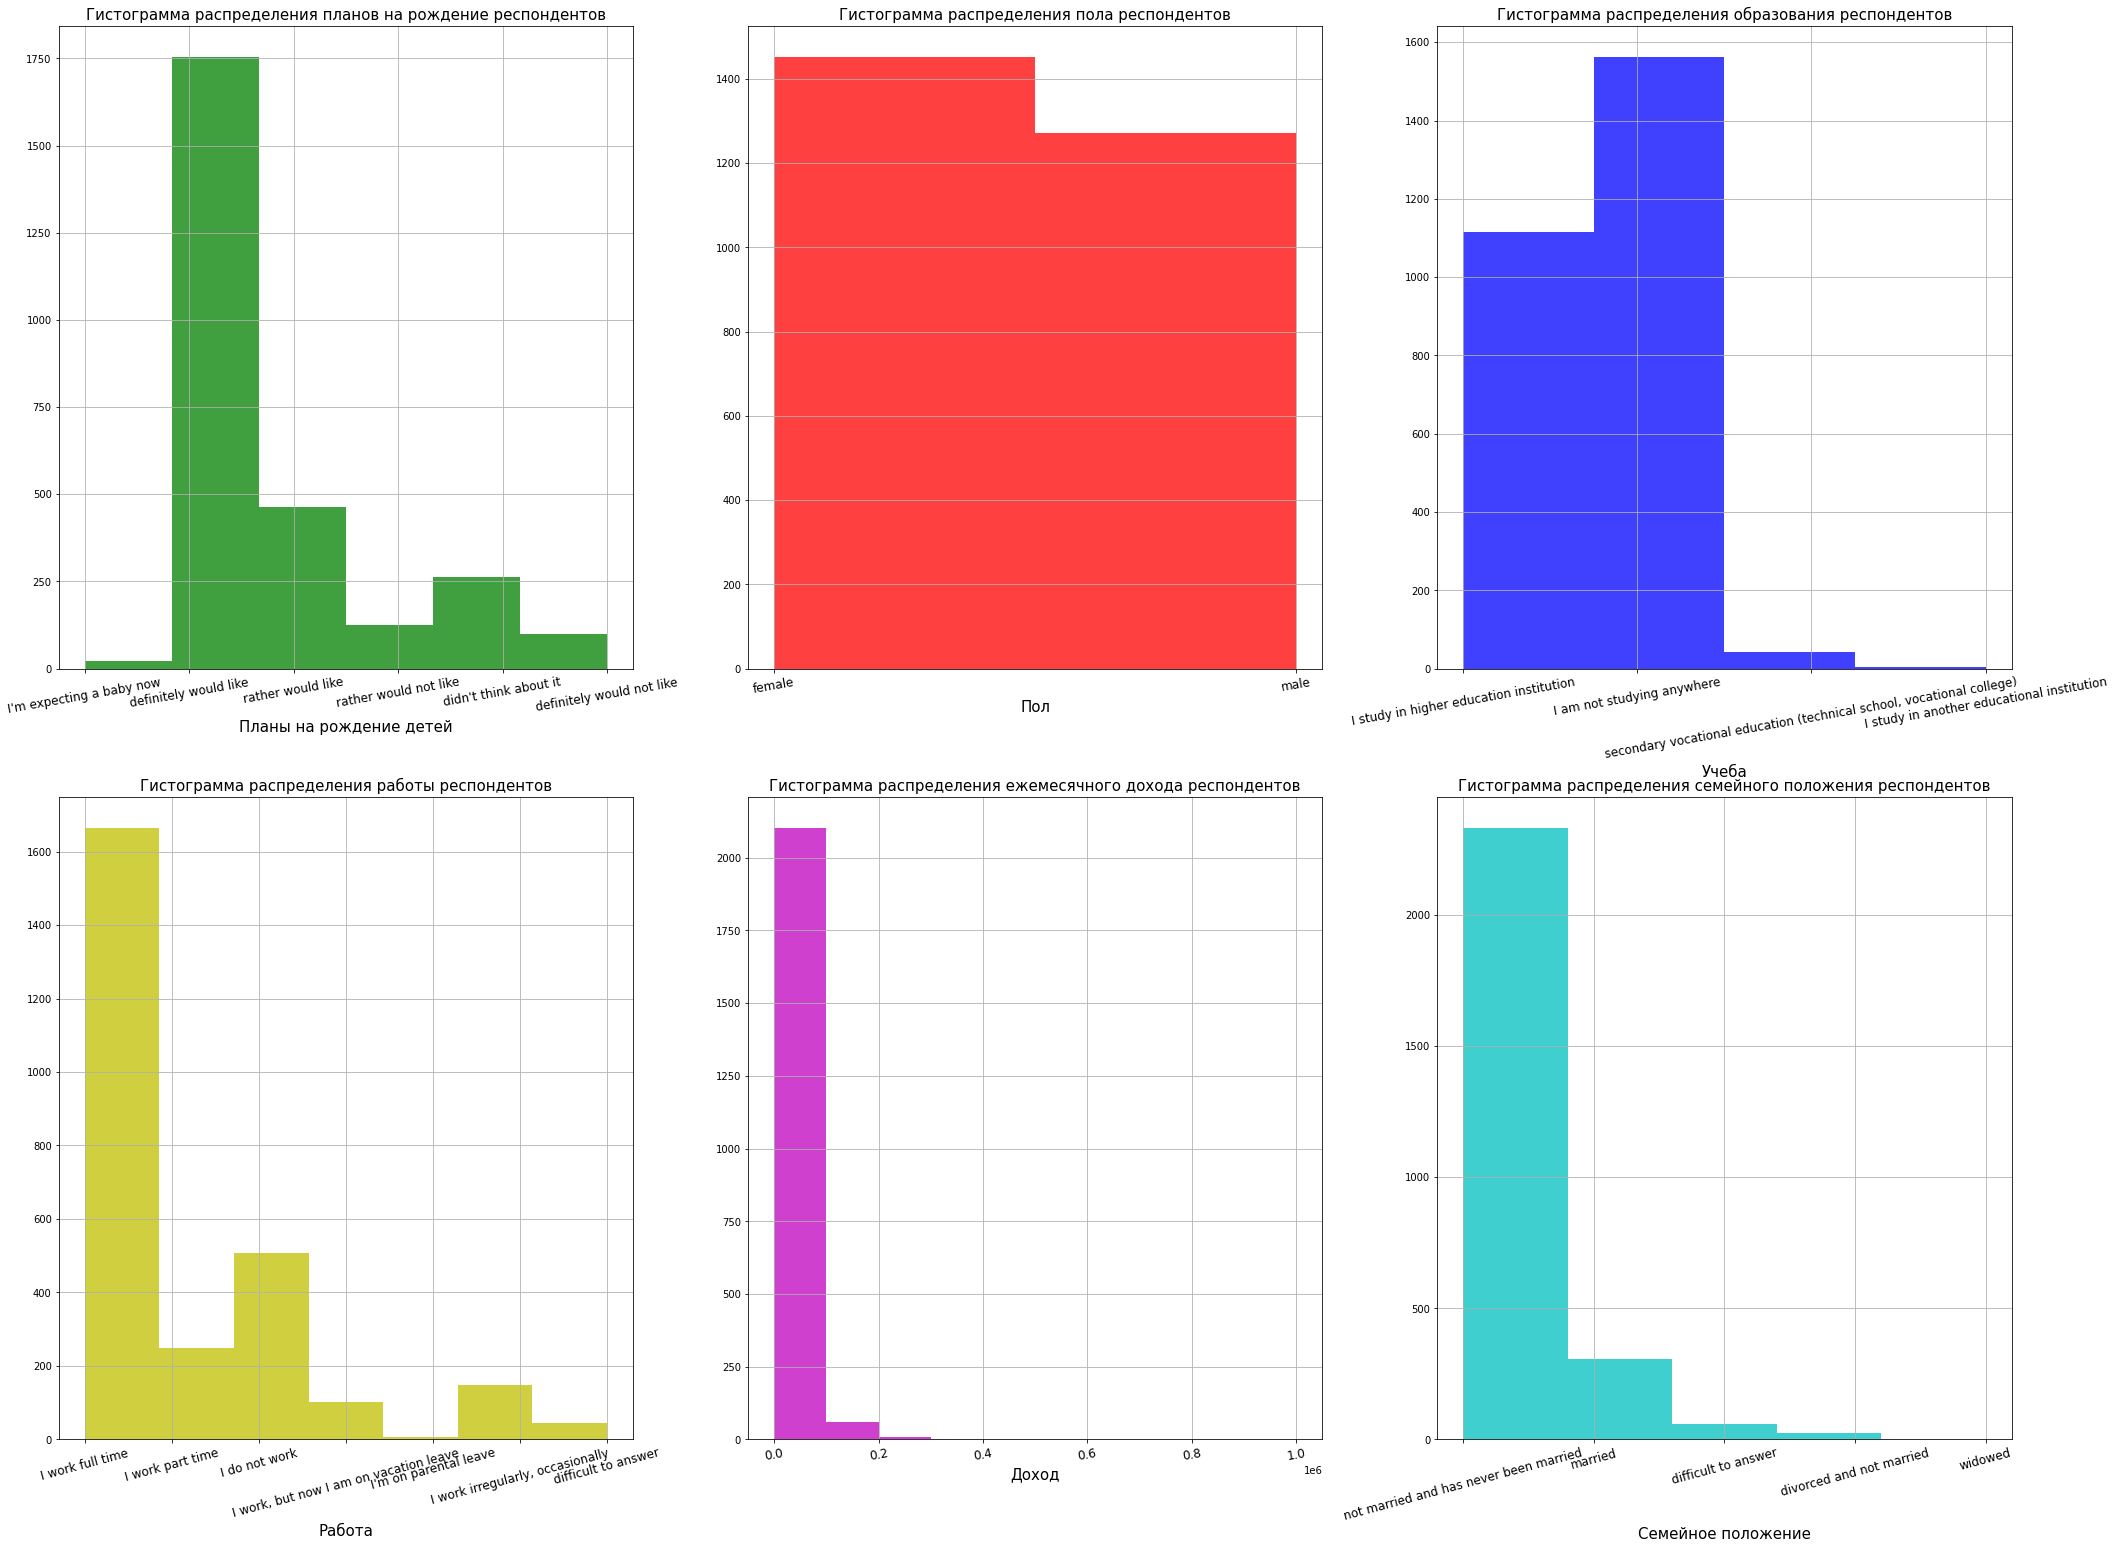

In [34]:
fig, axs = plt.subplots(2, 3, figsize=(35, 26))

n, bins, patches = axs[0,0].hist(df5678.iQ49, 6, facecolor='g', alpha=0.75)
axs[0, 0].set_xlabel('Планы на рождение детей', fontsize=15)
# axs[0, 0].set_ylabel('Вероятность')
axs[0, 0].set_title('Гистограмма распределения планов на рождение респондентов', fontsize=15)
axs[0, 0].tick_params(axis='x', labelrotation=10, labelsize='large')
axs[0, 0].grid(True)

n, bins, patches = axs[0,1].hist(df5678.iQ_gender, 2, facecolor='r', alpha=0.75)
axs[0, 1].set_xlabel('Пол', fontsize=15)
# axs[0, 1].set_ylabel('Вероятность')
axs[0, 1].set_title('Гистограмма распределения пола респондентов', fontsize=15)
axs[0, 1].tick_params(axis='x', labelrotation=10, labelsize='large')
axs[0, 1].grid(True)

n, bins, patches = axs[1,0].hist(df5678.iQ20, 7, facecolor='y', alpha=0.75)
axs[1, 0].set_xlabel('Работа', fontsize=15)
# axs[1, 0].set_ylabel('Вероятность')
axs[1, 0].set_title('Гистограмма распределения работы респондентов', fontsize=15)
axs[1, 0].tick_params(axis='x', labelrotation=15, labelsize='large')
axs[1, 0].grid(True)

n, bins, patches = axs[1,1].hist(df5678.iQ55_numbers, 10, facecolor='m', alpha=0.75)
axs[1, 1].set_xlabel('Доход', fontsize=15)
# axs[1, 1].set_ylabel('Вероятность')
axs[1, 1].set_title('Гистограмма распределения ежемесячного дохода респондентов',fontsize=15)
axs[1, 1].tick_params(axis='x', labelrotation=10, labelsize='large')
axs[1, 1].grid(True)

n, bins, patches = axs[0,2].hist(df5678.Corrected_iQ1, 4, facecolor='b', alpha=0.75)
axs[0,2].set_xlabel('Учеба', fontsize=15)
# axs[0,2].set_ylabel('Вероятность')
axs[0,2].set_title('Гистограмма распределения образования респондентов',fontsize=15)
axs[0,2].tick_params(axis='x', labelrotation=10, labelsize='large')
axs[0,2].grid(True)

n, bins, patches = axs[1,2].hist(df5678.iQ46, 5, facecolor='c', alpha=0.75)
axs[1,2].set_xlabel('Семейное положение', fontsize=15)
# axs[1,2].set_ylabel('Вероятность')
axs[1,2].set_title('Гистограмма распределения семейного положения респондентов',fontsize=15)
axs[1,2].tick_params(axis='x', labelrotation=15, labelsize='large')
axs[1,2].grid(True)

plt.show()

Then plot the relationships between the target variable and the other variables:

<Figure size 1152x1152 with 0 Axes>

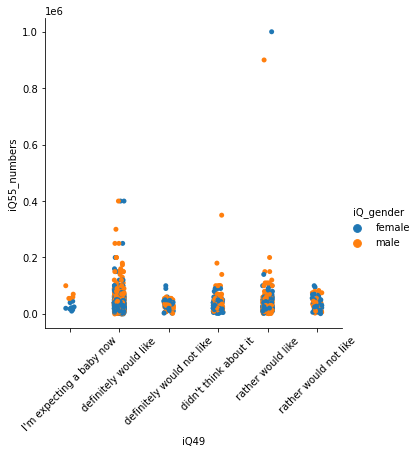

In [26]:
plt.figure(figsize=(16, 16))
chart = sns.catplot(x = "iQ49", y="iQ55_numbers", hue="iQ_gender", data=df5678)
chart.set_xticklabels(rotation=45)
# plt.show()


In [77]:
df5678.Corrected_iQ1.value_counts()

I am not studying anywhere                                               1563
I study in higher education institution                                  1116
secondary vocational education (technical school, vocational college)      42
I study in another educational institution                                  4
Name: Corrected_iQ1, dtype: int64

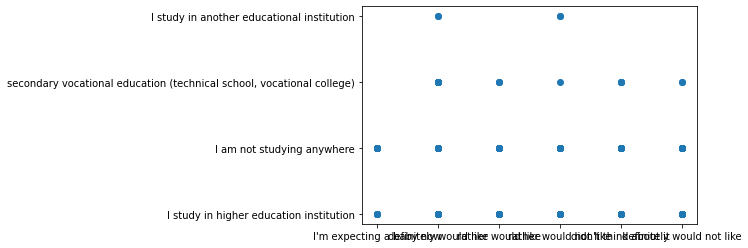

In [72]:
plt.scatter(df5678.iQ49, df5678.Corrected_iQ1)

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


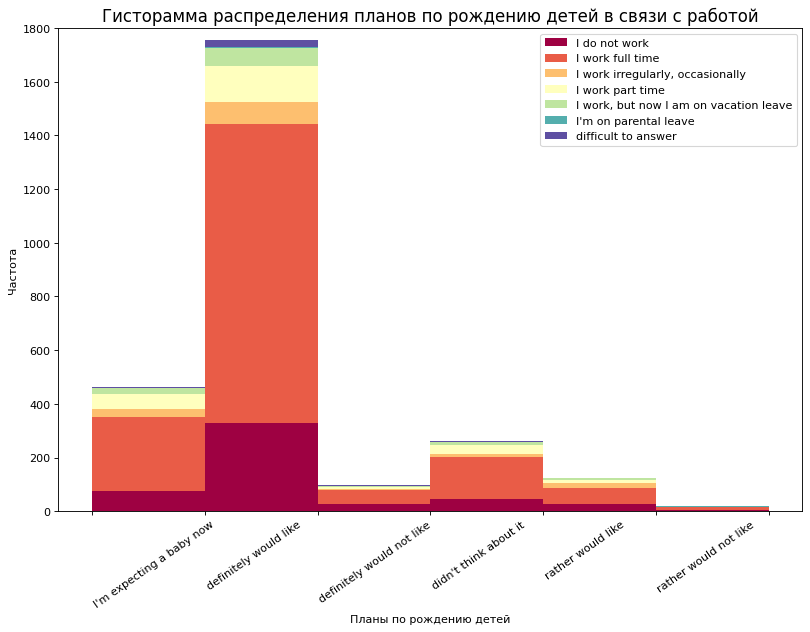

In [19]:
# Prepare data
x_var = 'iQ49'
groupby_var = 'iQ20'
df_agg = df5678.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df5678[x_var].values.tolist() for i, df5678 in df_agg]

# Draw
plt.figure(figsize=(12,8), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df5678[x_var].unique().__len__(), stacked=True, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df5678[groupby_var]).tolist(), colors[:len(vals)])})
plt.title("Гисторамма распределения планов по рождению детей в связи с работой", fontsize=15)
plt.xlabel("Планы по рождению детей")
plt.ylabel("Частота")
plt.ylim(0, 1800)
plt.xticks(ticks=bins, labels=np.unique(df5678[x_var]).tolist(), rotation=35, horizontalalignment='left')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


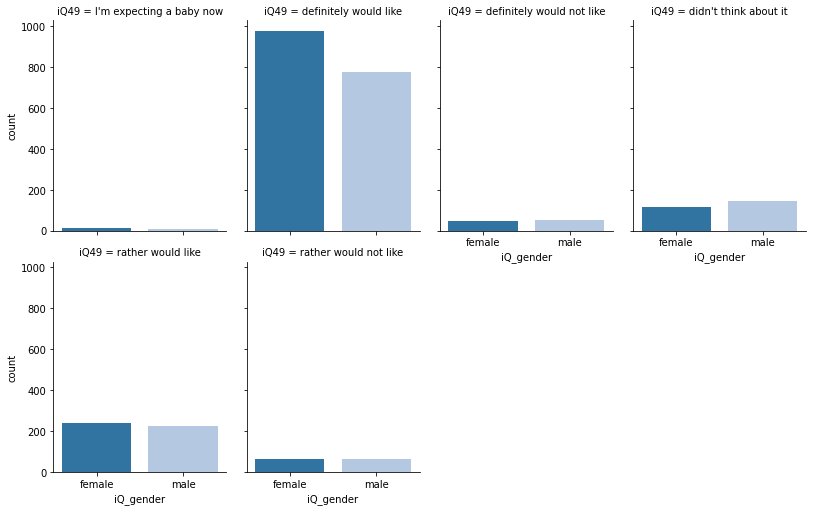

In [ ]:
g = sns.catplot("iQ_gender", col="iQ49", col_wrap=4, data=df5678, kind="count", height=3.5, aspect=.8, palette='tab20')

plt.show()

# Preprocessing

Separate the features into numerical and categorical ones, and process them:

In [47]:
to_num = ['hQ34_numbers', 'hQ44_numbers', 'hQ45_numbers', 'hQ52_numbers', 'iQ19_numbers', 'iQ55_numbers', 'iQ56_numbers', 'iQ57_numbers', 'iQ58_numbers', 'iQ59_numbers', 'iQ60_numbers', 'iQ61_numbers', 'iQ62_numbers', 'iQ63_numbers']

df5678.iQ63_numbers[df5678.iQ63_numbers == 'not valid value / suspicious answer'] = None

for col in to_num:
  df5678[col] = pd.to_numeric(df5678[col], downcast="float")

In [48]:
numeric_features = ['GQ_22_numbers', 'GQ72_numbers', 'iQ26_open', 'iQ34', 'iQ44_open', 'hQ34_numbers', 'hQ44_numbers', 'hQ45_numbers', 'hQ52_numbers',
                    'iQ19_numbers','iQ55_numbers', 'iQ56_numbers', 'iQ57_numbers', 'iQ58_numbers', 'iQ59_numbers', 'iQ60_numbers', 'iQ61_numbers', 'iQ62_numbers', 'iQ63_numbers']

df5678[numeric_features] = df5678[numeric_features].fillna(df5678.median()) #filling nans with median in numeric features (df5678.median() or 0)

In [134]:
for c in df5678.columns:
  if df5678[c].isna().sum() > 1700:
    print(c)

fQ8_spo_coded
fQ11_2
fQ11_3
fQ11_4
fQ11_5
fQ11_6
fQ13_1
fQ13_2
fQ13_3
fQ13_4
fQ13_5
fQ13_6
fQ13_7
fQ20_2
fQ20_3
fQ20_4
fQ20_5
fQ20_6
fQ25_coded
fQ27_vo_coded
fQ27_spo_coded
fQ28
fQ35_4
fQ35_5
fQ35_6
fQ35_7
fQ36_7
fQ36_8
fQ36_9
fQ36_10
fQ39_4
fQ39_5
fQ39_6
fQ39_7
fQ39_8
fQ39_9
fQ39_10
fQ39_11
fQ40_4
fQ40_5
fQ40_6
fQ40_7
fQ40_8
fQ40_9
fQ40_10
fQ40_11
fQ40_12
fQ47_3
fQ47_4
fQ47_5
fQ47_6
fQ47_7
fQ47_8
fQ47_9
fQ47_10
fQ47_11
fQ57_6
fQ57_7
fQ57_8
fQ57_9
fQ57_10
fQ57_11
fQ66_4
fQ68_4
fQ66_5
fQ68_5
fQ74_4
fQ74_5
fQ74_6
fQ74_7
fQ74_8
fQ74_9
fQ74_10
fQ94_4
fQ94_5
fQ94_6
fQ94_1_coded_2
fQ94_1_coded_3
fQ94_1_coded_4
fQ94_1_coded_5
fQ94_1_coded_6
fQ94_2_coded_1
fQ94_2_coded_2
fQ94_2_coded_3
fQ94_3_coded_1
fQ94_3_coded_2
fQ94_3_coded_3
fQ94_3_coded_4
fQ94_4_coded_2
fQ94_4_coded_3
fQ94_4_coded_4
fQ94_5_coded_1
fQ94_5_coded_2
fQ94_5_coded_3
fQ94_7_coded_1
fQ94_7_coded_2
fQ94_7_coded_3
fQ94_7_coded_4
fQ94_9696_coded_1
fQ94_9696_coded_2
fQ100_10
fQ100_11
fQ100_12
fQ100_13
fQ100_14
fQ100_15
fQ100_16
fQ10

In [49]:
#label encoding (nans is as new one category)
for col in df5678.columns:
  if df5678[col].dtype.name == 'category':
    df5678[col] = df5678[col].cat.codes

df5678

idstud  fQ1  fQ2  fQ3  ...  iQ93  iQ94  iQ95  values_answer_correctness
0     3160122.0    1    1   -1  ...     5     1     5                          0
1     4880114.0    1    3    0  ...     5     4     1                          0
2     4730115.0    1    0   -1  ...     1     2     4                          0
3     3500324.0    1    2    2  ...     5     4     1                          0
4     5050210.0    1    1   -1  ...     1     3     0                          0
...         ...  ...  ...  ...  ...   ...   ...   ...                        ...
2720  5080120.0    1    1   -1  ...     4     1     4                          0
2721  5080124.0    1    0   -1  ...     1     1     4                          0
2722  5090120.0    1    0   -1  ...     4     4     1                          0
2723  5100102.0    1    1   -1  ...     4     4     4                          0
2724  5100111.0    1    2    1  ...     5     0     1                          0

[2725 rows x 1429 columns]

# Baseline

In [28]:
X_base = df5678[['Corrected_iQ1', 'iQ3', 'iQ4', 'iQ10', 'iQ11', 'Corrected_iQ13',
                 'iQ14_1', 'iQ14_2', 'iQ14_3', 'iQ14_4', 'iQ14_5', 'iQ14_6', 'iQ14_7', 'iQ14_8', 'iQ14_9']] #features about study

y = df5678['iQ49']

X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=0.3, random_state=42)

In [29]:
base_logreg = LogisticRegression(max_iter=1000)
base_logreg.fit(X_train, y_train)
base_logreg_predict = base_logreg.predict(X_test)

base_logreg_cv_score = cross_val_score(base_logreg, X_base, y, cv=10)

print(base_logreg_cv_score)

print("Mean Accuracy: ", base_logreg_cv_score.mean())

[0.64102564 0.64468864 0.64468864 0.64102564 0.64102564 0.64705882
 0.64338235 0.64338235 0.64338235 0.64338235]
Mean Accuracy:  0.6433042447748332


# Feature selection

Let's build a correlation matrix:

In [ ]:
corr = df5678.corr() #for numerical features
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
corr = new_df.iloc[:, 800:].corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

In [50]:
#remove collinear columns

data = df5678.drop(columns=['fQ40_12', 'fQ15', 'fQ16', 'fQ25_coded', 'fQ27_vo_coded', 'fQ27_spo_coded', 'fQ28', 'fQ41', 'fQ42', 'fQ43', 'fQ44', 'fQ45', 'fQ46',
                              'fQ48', 'fQ49', 'fQ50', 'fQ51', 'fQ52', 'fQ53', 'fQ59', 'fQ94_5_coded_3', 'fQ74_7', 'fQ74_8', 'fQ74_9', 'fQ74_10', 'fQ66_2', 'fQ68_2',
                              'fQ66_3', 'fQ68_3', 'fQ66_4', 'fQ68_4', 'fQ66_5', 'fQ68_5', 'fQ100_19', 'itsex', 'GQ14_coded', 'GQ17_coded', 'GQ18_coded', 'GQ25', 'GQ26_1',
                              'GQ26_2', 'GQ26_3', 'GQ26_4', 'GQ26_5', 'GQ26_6', 'GQ75_coded', 'GQ100_coded_other', 'Inconsistent79_and_84', 'Corrected_hQ2',
                              'hQ3_1', 'hQ3_2', 'hQ3_3', 'hQ3_4', 'hQ3_5', 'hQ3_6', 'hQ3_7', 'hQ3_8', 'hQ3_9', 'hQ3_10', 'hQ3_11', 'hQ3_12', 'hQ3_13', 'hQ13',
                              'hQ17_coded', 'hQ17_1', 'hQ18_coded', 'hQ18_1', 'hQ19_coded', 'hQ19_1', 'hQ34', 'hQ51', 'hQ40', 'hQ41', 'hQ42', 'hQ43',
                              'Corrected_iQ32', 'iQ33_corrected_coded', 'Corrected_iQ35', 'iQ48',])


In [51]:
wave6_7 = [col for col in df6.columns if 'GQ7_' in col]
wave6_8 = [col for col in df6.columns if 'GQ8_' in col]
wave6_42 = [col for col in df6.columns if 'GQ42_' in col]
wave6_43 = [col for col in df6.columns if 'GQ43_' in col]
data = data.drop(columns=wave6_7)
data = data.drop(columns=wave6_8)
data = data.drop(columns=wave6_42)
data = data.drop(columns=wave6_43)

In [52]:
wave7_24 = [col for col in df7.columns if 'hQ24_' in col]
wave7_36 = [col for col in df7.columns if 'hQ36_' in col]
wave7_38 = [col for col in df7.columns if 'hQ38_' in col]
wave7_39 = [col for col in df7.columns if 'hQ39_' in col]
data = data.drop(columns=wave7_24)
data = data.drop(columns=wave7_36)
data = data.drop(columns=wave7_38)
data = data.drop(columns=wave7_39)

In [53]:
wave8_9 = [col for col in df8.columns if 'iQ9_' in col]
wave8_16 = [col for col in df8.columns if 'iQ16_' in col]
wave8_23 = [col for col in df8.columns if 'iQ23_' in col]
data = data.drop(columns=wave8_9)
data = data.drop(columns=wave8_16)
data = data.drop(columns=wave8_23)

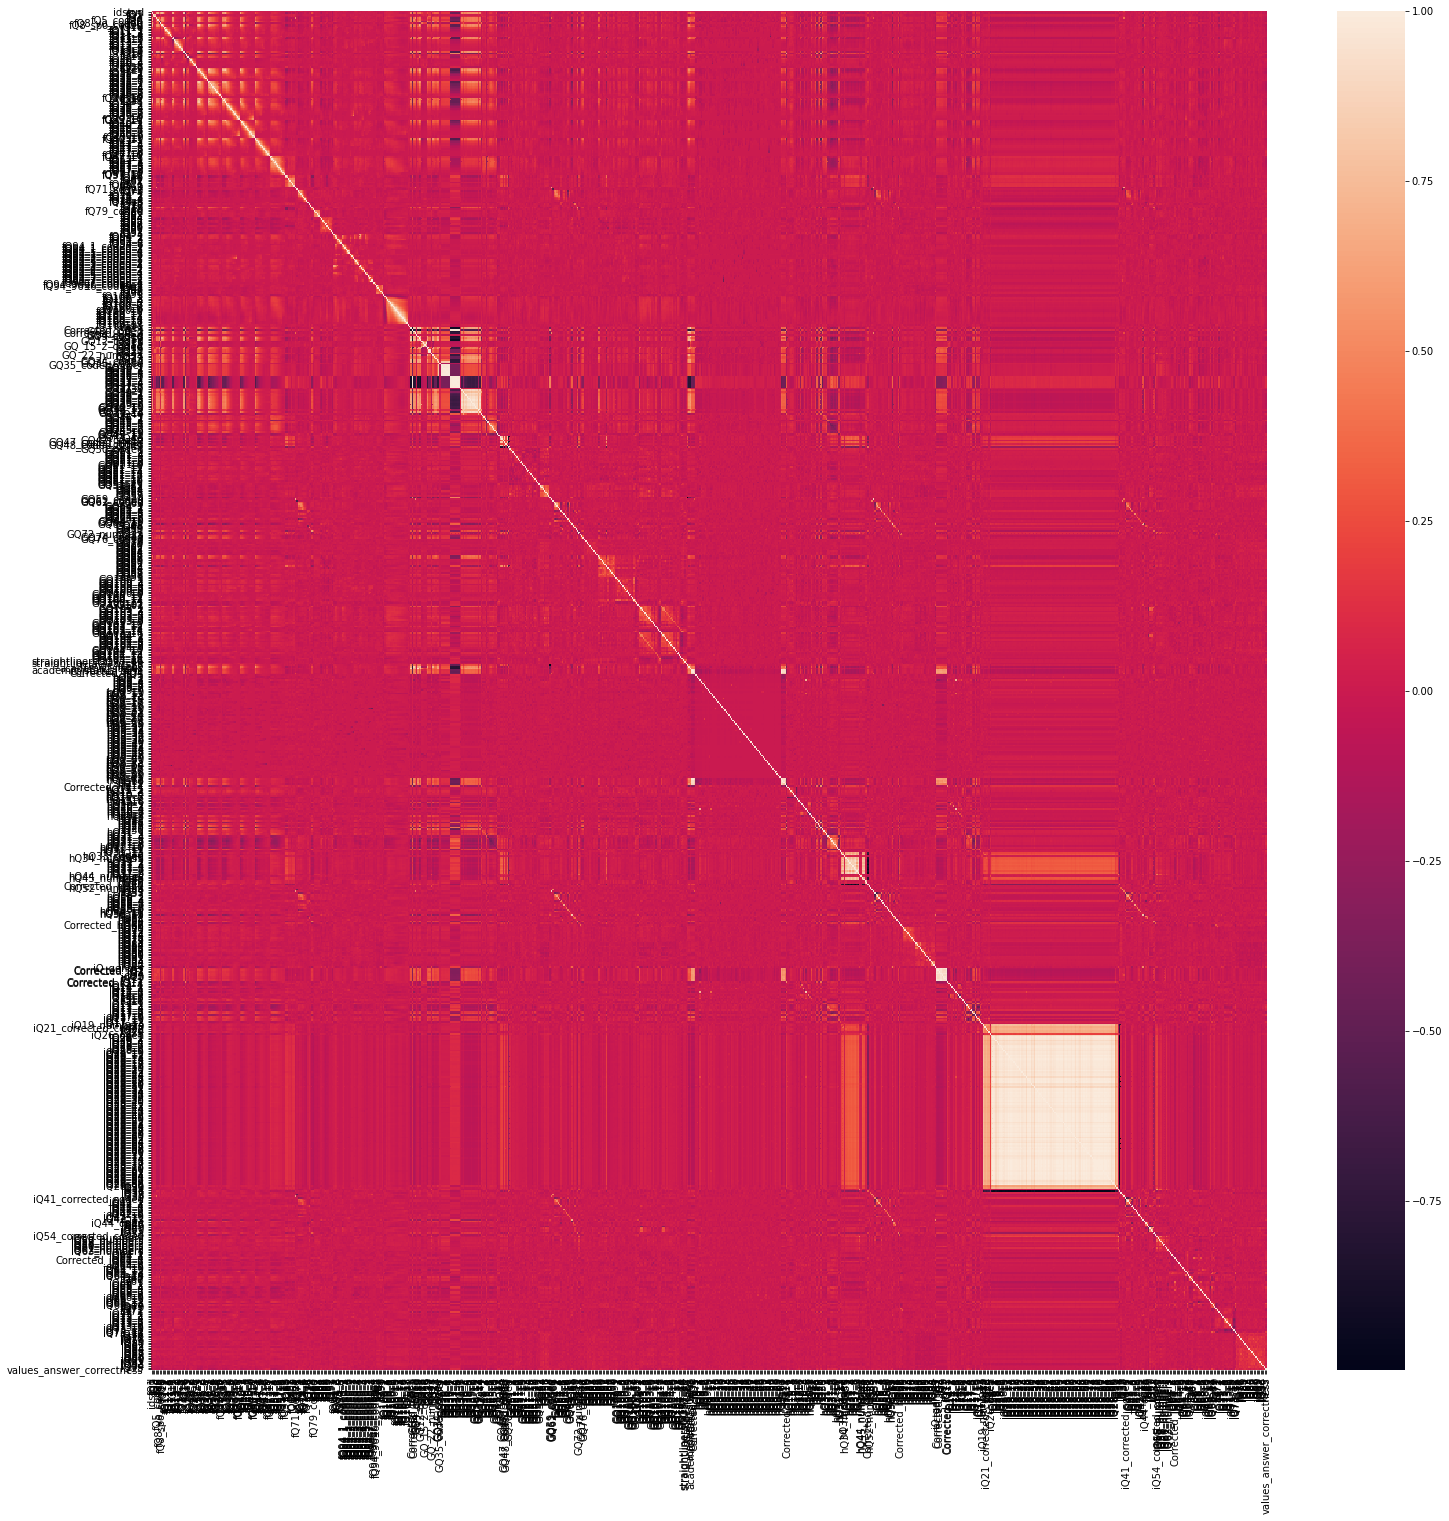

In [ ]:
corr = data.corr(method='spearman')
plt.figure(figsize = (25, 25))

ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, )

And let's scale the numerical features: 

In [34]:
scaler = StandardScaler()
norm_data = data.copy()
norm_data[numeric_features] = scaler.fit_transform(norm_data[numeric_features])

In [98]:
data

idstud  fQ1  fQ2  fQ3  ...  iQ93  iQ94  iQ95  values_answer_correctness
0     3160122.0    1    1   -1  ...     5     1     5                          0
1     4880114.0    1    3    0  ...     5     4     1                          0
2     4730115.0    1    0   -1  ...     1     2     4                          0
3     3500324.0    1    2    2  ...     5     4     1                          0
4     5050210.0    1    1   -1  ...     1     3     0                          0
...         ...  ...  ...  ...  ...   ...   ...   ...                        ...
2720  5080120.0    1    1   -1  ...     4     1     4                          0
2721  5080124.0    1    0   -1  ...     1     1     4                          0
2722  5090120.0    1    0   -1  ...     4     4     1                          0
2723  5100102.0    1    1   -1  ...     4     4     4                          0
2724  5100111.0    1    2    1  ...     5     0     1                          0

[2725 rows x 810 columns]

# Binary Encoding

In [54]:
categorical_features = [c for c in data.columns if c not in numeric_features]
categorical_features.remove('iQ49')
categorical_features.remove('idstud')

In [55]:
binary_features = []
for c in data.columns:
  if c not in numeric_features:
    if len(data[c].unique()) > 2:
      binary_features.append(c)

In [56]:
binary_features.remove('iQ49')
binary_features.remove('idstud')
len(binary_features)

492

In [57]:
X_binary = data.drop(columns = ['iQ49'])
y = data['iQ49']
ce_bin = ce.BinaryEncoder(cols = binary_features)
X_binary = ce_bin.fit_transform(X_binary, y)

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


In [103]:
X_binary

idstud  fQ1_0  fQ1_1  ...  iQ95_2  iQ95_3  values_answer_correctness
0     3160122.0      0      0  ...       0       1                          0
1     4880114.0      0      0  ...       1       0                          0
2     4730115.0      0      0  ...       1       1                          0
3     3500324.0      0      0  ...       1       0                          0
4     5050210.0      0      0  ...       0       0                          0
...         ...    ...    ...  ...     ...     ...                        ...
2720  5080120.0      0      0  ...       1       1                          0
2721  5080124.0      0      0  ...       1       1                          0
2722  5090120.0      0      0  ...       1       0                          0
2723  5100102.0      0      0  ...       1       1                          0
2724  5100111.0      0      0  ...       1       0                          0

[2725 rows x 2257 columns]

# L-1 regularization

In [ ]:
logreg = LogisticRegression(C=5, penalty='l1', solver='saga', max_iter=10000).fit(X, y)
model = SelectFromModel(logreg, prefit=True)
columns_l1lr= model.get_support()
X_l1lr = model.transform(X)
X_l1lr.shape

In [ ]:
X = data.drop(columns = ['iQ49'])
X_norm = norm_data.drop(columns = ['iQ49'])
#X_binary
y = data['iQ49']

In [58]:
lsvc = LinearSVC(C=0.03, penalty="l1", dual=False, max_iter=5000).fit(X_binary, y) # C=0.03 for less features or 0.1
model = SelectFromModel(lsvc, prefit=True)
columns_l1svc = model.get_support()
X_l1svc = model.transform(X_binary)
X_l1svc.shape

Liblinear failed to converge, increase the number of iterations.


(2725, 314)

In [114]:
X_binary.columns[columns_l1svc]

Index(['fQ3_3', 'fQ5_coded_4', 'fQ8_vo_coded_4', 'fQ8_vo_coded_5', 'fQ11_1_3',
       'fQ12_3', 'fQ19_3', 'fQ19_4', 'fQ20_1_3', 'fQ20_1_4',
       ...
       'iQ90_1', 'iQ91_1', 'iQ91_3', 'iQ92_3', 'iQ93_1', 'iQ93_3', 'iQ94_1',
       'iQ94_2', 'iQ94_3', 'iQ95_2'],
      dtype='object', length=314)

In [59]:
be_data = pd.DataFrame(X_l1svc, columns=X_binary.columns[columns_l1svc])
be_data

fQ3_3  fQ5_coded_4  fQ8_vo_coded_4  ...  iQ94_2  iQ94_3  iQ95_2
0       1.0          0.0             0.0  ...     0.0     1.0     0.0
1       0.0          0.0             0.0  ...     1.0     0.0     1.0
2       1.0          0.0             0.0  ...     1.0     1.0     1.0
3       1.0          0.0             0.0  ...     1.0     0.0     1.0
4       1.0          0.0             1.0  ...     0.0     0.0     0.0
...     ...          ...             ...  ...     ...     ...     ...
2720    1.0          0.0             0.0  ...     0.0     1.0     1.0
2721    1.0          0.0             0.0  ...     0.0     1.0     1.0
2722    1.0          0.0             0.0  ...     1.0     0.0     1.0
2723    1.0          1.0             0.0  ...     1.0     0.0     1.0
2724    0.0          0.0             0.0  ...     1.0     0.0     1.0

[2725 rows x 314 columns]

# Manual Variable Selection

In [ ]:
selected_X = X.loc[:, columns_l1svc]
col = selected_X.columns

In [ ]:
manual = [c for c in col if 'iQ68_' in c]
manual = manual + [c for c in col if 'hQ9_' in c]
manual = manual + [c for c in col if 'hQ37_' in c]
manual = manual + [c for c in col if 'hQ58_' in c]
manual = manual + [c for c in col if 'GQ34_' in c]
manual = manual + [c for c in col if 'GQ35_' in c]
manual = manual + [c for c in col if 'GQ37_' in c]
manual = manual + [c for c in col if 'GQ64_' in c]
manual = manual + [c for c in col if 'GQ103_' in c]
manual = manual + [c for c in col if 'GQ104_' in c]
manual = manual + [c for c in col if 'fQ74_' in c]
manual = manual + ['Corrected_iQ2', 'iQ3', 'iQ5', 'iQ15', 'iQ20', 'iQ22', 'iQ25', 'iQ31', 'iQ37',
                   'Corrected_iQ12',  'Corrected_iQ13', 'iQ19_numbers', 'iQ26_open', 'iQ41_corrected_coded', 'iQ43', 'iQ46', 'iQ47', 'iQ50', 'iQ51', 'iQ52', 'iQ53',
                   'iQ54_corrected_coded', 'iQ55_numbers', 'iQ56_numbers', 'iQ57_numbers', 'iQ58_numbers', 'iQ59_numbers', 'iQ60_numbers', 'iQ61_numbers',
                   'iQ62_numbers', 'iQ63_numbers','iQ71', 'iQ72']

manual = manual + ['hQ16', 'hQ21', 'hQ32', 'hQ47', 'hQ53', 'hQ57', 'hQ65', 'hQ32', 'hQ68', 'hQ69', 'hQ70', 'hQ71', 'hQ72', 'hQ73',
                   'hQ74', 'hQ75','hQ78', 'Corrected_hQ50', 'hQ33_coded', 'hQ34_numbers']

manual = manual + ['Corrected_GQ_3', 'GQ10',  'GQ12_coded', 'GQ10', 'GQ27',
                   'GQ33', 'GQ38', 'GQ49', 'GQ50_coded', 'GQ59_coded', 'GQ63', 'GQ69', 'GQ71', 'GQ73', 'GQ79', 'GQ83', 'GQ85',
                   'GQ93', 'GQ97', 'academic_status_form']

manual = manual + ['fQ2', 'fQ3', 'fQ6', 'fQ2', 'fQ18', 'fQ19', 'fQ29', 'fQ58', 'fQ61', 'fQ62', 'fQ66_1', 'fQ69', 'fQ73', 'fQ76',
                   'fQ78', 'fQ79_coded', 'fQ81', 'fQ83']


In [ ]:
manual_data = selected_X[manual]
manual_data

hQ37_5  hQ37_8  GQ34_coded  GQ35_coded  ...  fQ78  fQ79_coded  fQ81  fQ83
0          0       0           1           1  ...     1           0     2     2
1          0       1          -1          -1  ...     5           7     1     1
2          1       0          -1          -1  ...     2           1     0     1
3         -1      -1           2           3  ...     2          10     1     2
4         -1      -1           2           1  ...     5           7     0     1
...      ...     ...         ...         ...  ...   ...         ...   ...   ...
2720       0       1           2           1  ...     5           7     1     1
2721       0       0           5           6  ...     5           0     2     2
2722      -1      -1           5           5  ...     5          10     0     0
2723      -1      -1           2           1  ...     5           7     2     2
2724       0       0           5           5  ...     5           0     0     0

[2725 rows x 117 columns]

In [ ]:
manual = manual_data.columns.unique()
manual_data = selected_X[manual]
manual_data.shape

(2725, 114)

# Predicting models

In [ ]:
X_n_l1svc # with normalization
be_data # with binary encoding
X_l1svc 
manual_data # manually chosen

In [60]:
X_train, X_test, y_train, y_test = train_test_split(be_data, y, test_size=0.3, random_state=42)

LightGBM:

In [61]:
lgbm = LGBMClassifier(max_depth=2)
lgbm.fit(X_train, y_train)
lgbm_predict = lgbm.predict(X_test)

lgbm_cv_score = cross_val_score(lgbm, be_data, y, cv=10)

print(lgbm_cv_score)
print('\n')
print("Mean accuracy", lgbm_cv_score.mean())

[0.78021978 0.75824176 0.77655678 0.79120879 0.76556777 0.77205882
 0.77573529 0.77205882 0.77573529 0.75735294]


Mean accuracy 0.7724736048265459


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.81      0.97      0.88       521
           2       0.29      0.08      0.12        26
           3       0.60      0.89      0.72        82
           4       0.70      0.26      0.38       152
           5       0.23      0.09      0.13        33

    accuracy                           0.76       818
   macro avg       0.60      0.42      0.44       818
weighted avg       0.73      0.76      0.72       818



XGBoost:


In [63]:
xgbc = XGBClassifier(max_depth=3, eta=0.05, random_state=0)
xgbc.fit(X_train, y_train)
xgbc_predict = xgbc.predict(X_test)

xgbc_cv_score = cross_val_score(xgbc, be_data, y, cv=10)

print(xgbc_cv_score)
print('\n')
print("Mean accuracy", xgbc_cv_score.mean())

[0.77655678 0.77655678 0.76190476 0.76923077 0.75091575 0.78676471
 0.78676471 0.75735294 0.77205882 0.73161765]


Mean accuracy 0.7669723658694247


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.81      0.97      0.88       521
           2       0.43      0.23      0.30        26
           3       0.64      0.85      0.73        82
           4       0.71      0.24      0.36       152
           5       0.29      0.15      0.20        33

    accuracy                           0.76       818
   macro avg       0.65      0.45      0.48       818
weighted avg       0.74      0.76      0.72       818



In [ ]:
xgbc.get_params

<bound method LGBMModel.get_params of LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)>

GradientBoosting (from sklearn library):


In [ ]:
clf = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
clf_predict = clf.predict(X_test)

clf_cv_score = cross_val_score(clf, manual_data, y, cv=10)

print(clf_cv_score)
print('\n')
print("Mean accuracy", clf_cv_score.mean())

[0.75457875 0.74725275 0.74725275 0.77289377 0.76190476 0.77941176
 0.76102941 0.76470588 0.73529412 0.72426471]


Mean accuracy 0.7548588666235725


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.82      0.94      0.87       521
           2       0.07      0.04      0.05        26
           3       0.61      0.77      0.68        82
           4       0.58      0.28      0.37       152
           5       0.39      0.27      0.32        33

    accuracy                           0.74       818
   macro avg       0.58      0.55      0.55       818
weighted avg       0.71      0.74      0.71       818



Random Forest:

In [ ]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [ ]:
rfc = RandomForestClassifier(max_depth=20)
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)

rfc_cv_score = cross_val_score(rfc, manual_data, y, cv=10)

print(rfc_cv_score)
print('\n')
print("Mean accuracy", rfc_cv_score.mean())

[0.75091575 0.75457875 0.76190476 0.75091575 0.76556777 0.74632353
 0.75367647 0.74632353 0.74264706 0.73897059]


Mean accuracy 0.7511823960353372


Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.78      1.00      0.88       521
           2       0.25      0.04      0.07        26
           3       0.59      0.94      0.72        82
           4       0.92      0.07      0.13       152
           5       0.33      0.06      0.10        33

    accuracy                           0.75       818
   macro avg       0.48      0.35      0.32       818
weighted avg       0.75      0.75      0.66       818



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree:

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_predict = dt.predict(X_test)

dt_cv_score = cross_val_score(dt, manual_data, y, cv=10)

print(dt_cv_score)
print('\n')
print("Mean accuracy", dt_cv_score.mean())

[0.67765568 0.65934066 0.65934066 0.65934066 0.67032967 0.70220588
 0.63602941 0.69852941 0.70588235 0.68382353]


Mean accuracy 0.6752477914242621


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.81      0.84      0.82       521
           2       0.22      0.19      0.20        26
           3       0.58      0.54      0.56        82
           4       0.36      0.32      0.34       152
           5       0.19      0.24      0.21        33

    accuracy                           0.67       818
   macro avg       0.53      0.52      0.52       818
weighted avg       0.66      0.67      0.66       818



Logistic Regression:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_l1lr, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

logreg_predict = logreg.predict(X_test)

logreg_cv_score = cross_val_score(logreg, X_l1lr, y, cv=10)

print("=== All AUC Scores ===")
print(logreg_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", logreg_cv_score.mean())

In [ ]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-4, 2, 20)
searcher = GridSearchCV(lasso_pipeline, [{"regression__alpha": alphas}], scoring=rmse_scorer)
searcher.fit(X_test1, y_test1)

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

#**For iQ50 as a target variable:**

# Merging data

Merging data from different waves by 'idstud' column:

In [11]:
df78 = df7.merge(df8_50, how='inner', on='idstud')
df78.shape

(2461, 751)

In [12]:
df678 = df6.merge(df78, how='inner', on='idstud')
df678.shape

(2371, 1208)

In [13]:
df5678 = df5.merge(df678, how='inner', on='idstud')
df5678.shape

(2219, 1429)

# Preprocessing

In [15]:
df5678.iQ49.corr(df5678.iQ50, method='spearman')

-0.25178353769624295

In [37]:
df5678.iQ50.value_counts()

6    661
3    610
7    433
4    241
0    232
5     33
2      6
1      3
Name: iQ50, dtype: int64

In [16]:
df5678['y'] = 0 #make a binary column from iQ50
df5678['y'][df5678.iQ50 == 'in the next three years'] = 1
df5678['y'][df5678.iQ50 == 'in the next year or two'] = 1
df5678.y.value_counts()


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0    1125
1    1094
Name: y, dtype: int64

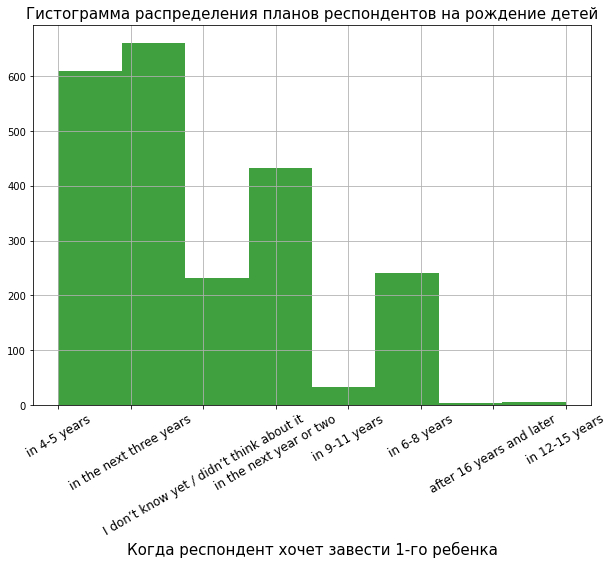

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(10, 7))

n, bins, patches = axs.hist(df5678.iQ50, 8, facecolor='g', alpha=0.75)
axs.set_xlabel('Когда респондент хочет завести 1-го ребенка', fontsize=15)
# axs[0, 0].set_ylabel('Вероятность')
axs.set_title('Гистограмма распределения планов респондентов на рождение детей', fontsize=15)
axs.tick_params(axis='x', labelrotation=30, labelsize='large')
axs.grid(True)

plt.show()

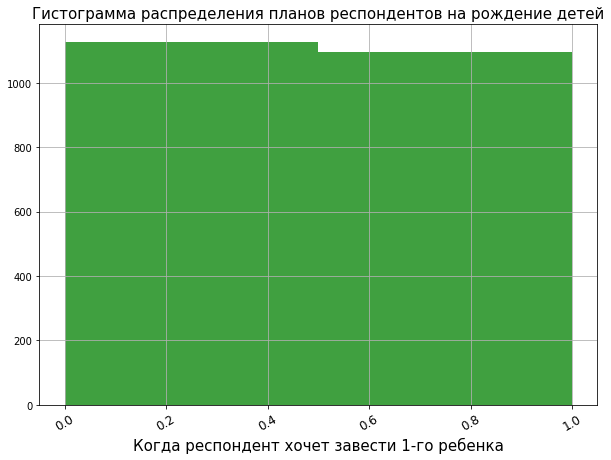

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(10, 7))

n, bins, patches = axs.hist(df5678.y, 2, facecolor='g', alpha=0.75)
axs.set_xlabel('Когда респондент хочет завести 1-го ребенка', fontsize=15)
# axs[0, 0].set_ylabel('Вероятность')
axs.set_title('Гистограмма распределения планов респондентов на рождение детей', fontsize=15)
axs.tick_params(axis='x', labelrotation=30, labelsize='large')
axs.grid(True)

plt.show()

Separate the features into numerical and categorical ones, and process them:

In [17]:
to_num = ['hQ34_numbers', 'hQ44_numbers', 'hQ45_numbers', 'hQ52_numbers', 'iQ19_numbers', 'iQ55_numbers', 'iQ56_numbers', 'iQ57_numbers', 'iQ58_numbers', 'iQ59_numbers', 'iQ60_numbers', 'iQ61_numbers', 'iQ62_numbers', 'iQ63_numbers']

df5678.iQ63_numbers[df5678.iQ63_numbers == 'not valid value / suspicious answer'] = None

for col in to_num:
  df5678[col] = pd.to_numeric(df5678[col], downcast="float")

In [18]:
numeric_features = ['GQ_22_numbers', 'GQ72_numbers', 'iQ26_open', 'iQ34', 'iQ44_open', 'hQ34_numbers', 'hQ44_numbers', 'hQ45_numbers', 'hQ52_numbers',
                    'iQ19_numbers','iQ55_numbers', 'iQ56_numbers', 'iQ57_numbers', 'iQ58_numbers', 'iQ59_numbers', 'iQ60_numbers', 'iQ61_numbers', 'iQ62_numbers', 'iQ63_numbers']

df5678[numeric_features] = df5678[numeric_features].fillna(df5678.median()) #filling nans with median in numeric features (df5678.median() or 0)

In [146]:
for c in df5678.columns:
  if df5678[c].isna().sum() > 2000:
    print(c)

fQ11_2
fQ11_3
fQ11_4
fQ11_5
fQ11_6
fQ13_2
fQ13_3
fQ13_4
fQ13_5
fQ13_6
fQ13_7
fQ20_3
fQ20_4
fQ20_5
fQ20_6
fQ27_vo_coded
fQ35_5
fQ35_6
fQ35_7
fQ36_8
fQ36_9
fQ36_10
fQ39_5
fQ39_6
fQ39_7
fQ39_8
fQ39_9
fQ39_10
fQ39_11
fQ40_5
fQ40_6
fQ40_7
fQ40_8
fQ40_9
fQ40_10
fQ40_11
fQ40_12
fQ47_4
fQ47_5
fQ47_6
fQ47_7
fQ47_8
fQ47_9
fQ47_10
fQ47_11
fQ57_8
fQ57_9
fQ57_10
fQ57_11
fQ66_5
fQ68_5
fQ74_4
fQ74_5
fQ74_6
fQ74_7
fQ74_8
fQ74_9
fQ74_10
fQ94_4
fQ94_5
fQ94_6
fQ94_1_coded_3
fQ94_1_coded_4
fQ94_1_coded_5
fQ94_1_coded_6
fQ94_2_coded_1
fQ94_2_coded_2
fQ94_2_coded_3
fQ94_3_coded_2
fQ94_3_coded_3
fQ94_3_coded_4
fQ94_4_coded_2
fQ94_4_coded_3
fQ94_4_coded_4
fQ94_5_coded_2
fQ94_5_coded_3
fQ94_7_coded_1
fQ94_7_coded_2
fQ94_7_coded_3
fQ94_7_coded_4
fQ94_9696_coded_1
fQ94_9696_coded_2
fQ100_13
fQ100_14
fQ100_15
fQ100_16
fQ100_17
fQ100_18
fQ100_19
GQ13
GQ14_coded
GQ15
GQ_15_2_coded
GQ16
GQ17_coded
GQ18_coded
GQ47_coded_other
GQ48_coded_other
GQ59_coded
GQ100_coded_other
hQ18_coded
hQ18_1
hQ19_coded
hQ19_1


In [19]:
#label encoding (nans is as new one category)
for col in df5678.columns:
  if df5678[col].dtype.name == 'category':
    df5678[col] = df5678[col].cat.codes

df5678

idstud  fQ1  fQ2  fQ3  ...  iQ94  iQ95  values_answer_correctness  y
0     4880114.0    1    3    0  ...     4     1                          0  0
1     4730115.0    1    0   -1  ...     2     4                          0  1
2     3500324.0    1    2    2  ...     4     1                          0  0
3     5050210.0    1    1   -1  ...     3     0                          0  0
4     3140202.0    1    1   -1  ...     4     1                          0  1
...         ...  ...  ...  ...  ...   ...   ...                        ... ..
2214  5080120.0    1    1   -1  ...     1     4                          0  1
2215  5080124.0    1    0   -1  ...     1     4                          0  0
2216  5090120.0    1    0   -1  ...     4     1                          0  1
2217  5100102.0    1    1   -1  ...     4     4                          0  0
2218  5100111.0    1    2    1  ...     0     1                          0  0

[2219 rows x 1430 columns]

# Baseline

In [ ]:
X_base = df5678[['Corrected_iQ1', 'iQ3', 'iQ4', 'iQ10', 'iQ11', 'Corrected_iQ13',
                 'iQ14_1', 'iQ14_2', 'iQ14_3', 'iQ14_4', 'iQ14_5', 'iQ14_6', 'iQ14_7', 'iQ14_8', 'iQ14_9']] #features about study and maybe , 'iQ49'

y = df5678['y']

X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=0.3, random_state=42)

In [ ]:
base_logreg = LogisticRegression(max_iter=1000)
base_logreg.fit(X_train, y_train)
base_logreg_predict = base_logreg.predict(X_test)

base_logreg_cv_score = cross_val_score(base_logreg, X_base, y, cv=10)

print(base_logreg_cv_score)

print("Mean Accuracy: ", base_logreg_cv_score.mean())

[0.52702703 0.58558559 0.56306306 0.55405405 0.6036036  0.54054054
 0.58558559 0.51801802 0.56306306 0.58823529]
Mean Accuracy:  0.5628775834658187


# Feature selection

Let's build a correlation matrix:

In [ ]:
corr = df5678.corr() #for numerical features
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


In [ ]:
corr = new_df.iloc[:, 800:].corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

In [20]:
#remove collinear columns

data = df5678.drop(columns=['fQ40_12', 'fQ15', 'fQ16', 'fQ25_coded', 'fQ27_vo_coded', 'fQ27_spo_coded', 'fQ28', 'fQ41', 'fQ42', 'fQ43', 'fQ44', 'fQ45', 'fQ46',
                              'fQ48', 'fQ49', 'fQ50', 'fQ51', 'fQ52', 'fQ53', 'fQ59', 'fQ94_5_coded_3', 'fQ74_7', 'fQ74_8', 'fQ74_9', 'fQ74_10', 'fQ66_2', 'fQ68_2',
                              'fQ66_3', 'fQ68_3', 'fQ66_4', 'fQ68_4', 'fQ66_5', 'fQ68_5', 'fQ100_19', 'itsex', 'GQ14_coded', 'GQ17_coded', 'GQ18_coded', 'GQ25', 'GQ26_1',
                              'GQ26_2', 'GQ26_3', 'GQ26_4', 'GQ26_5', 'GQ26_6', 'GQ75_coded', 'GQ100_coded_other', 'Inconsistent79_and_84', 'Corrected_hQ2',
                              'hQ3_1', 'hQ3_2', 'hQ3_3', 'hQ3_4', 'hQ3_5', 'hQ3_6', 'hQ3_7', 'hQ3_8', 'hQ3_9', 'hQ3_10', 'hQ3_11', 'hQ3_12', 'hQ3_13', 'hQ13',
                              'hQ17_coded', 'hQ17_1', 'hQ18_coded', 'hQ18_1', 'hQ19_coded', 'hQ19_1', 'hQ34', 'hQ51', 'hQ40', 'hQ41', 'hQ42', 'hQ43',
                              'Corrected_iQ32', 'iQ33_corrected_coded', 'Corrected_iQ35', 'iQ48',])


In [21]:
wave6_7 = [col for col in df6.columns if 'GQ7_' in col]
wave6_8 = [col for col in df6.columns if 'GQ8_' in col]
wave6_42 = [col for col in df6.columns if 'GQ42_' in col]
wave6_43 = [col for col in df6.columns if 'GQ43_' in col]
data = data.drop(columns=wave6_7)
data = data.drop(columns=wave6_8)
data = data.drop(columns=wave6_42)
data = data.drop(columns=wave6_43)

In [22]:
wave7_24 = [col for col in df7.columns if 'hQ24_' in col]
wave7_36 = [col for col in df7.columns if 'hQ36_' in col]
wave7_38 = [col for col in df7.columns if 'hQ38_' in col]
wave7_39 = [col for col in df7.columns if 'hQ39_' in col]
data = data.drop(columns=wave7_24)
data = data.drop(columns=wave7_36)
data = data.drop(columns=wave7_38)
data = data.drop(columns=wave7_39)

In [23]:
wave8_9 = [col for col in df8.columns if 'iQ9_' in col]
wave8_16 = [col for col in df8.columns if 'iQ16_' in col]
wave8_23 = [col for col in df8.columns if 'iQ23_' in col]
data = data.drop(columns=wave8_9)
data = data.drop(columns=wave8_16)
data = data.drop(columns=wave8_23)

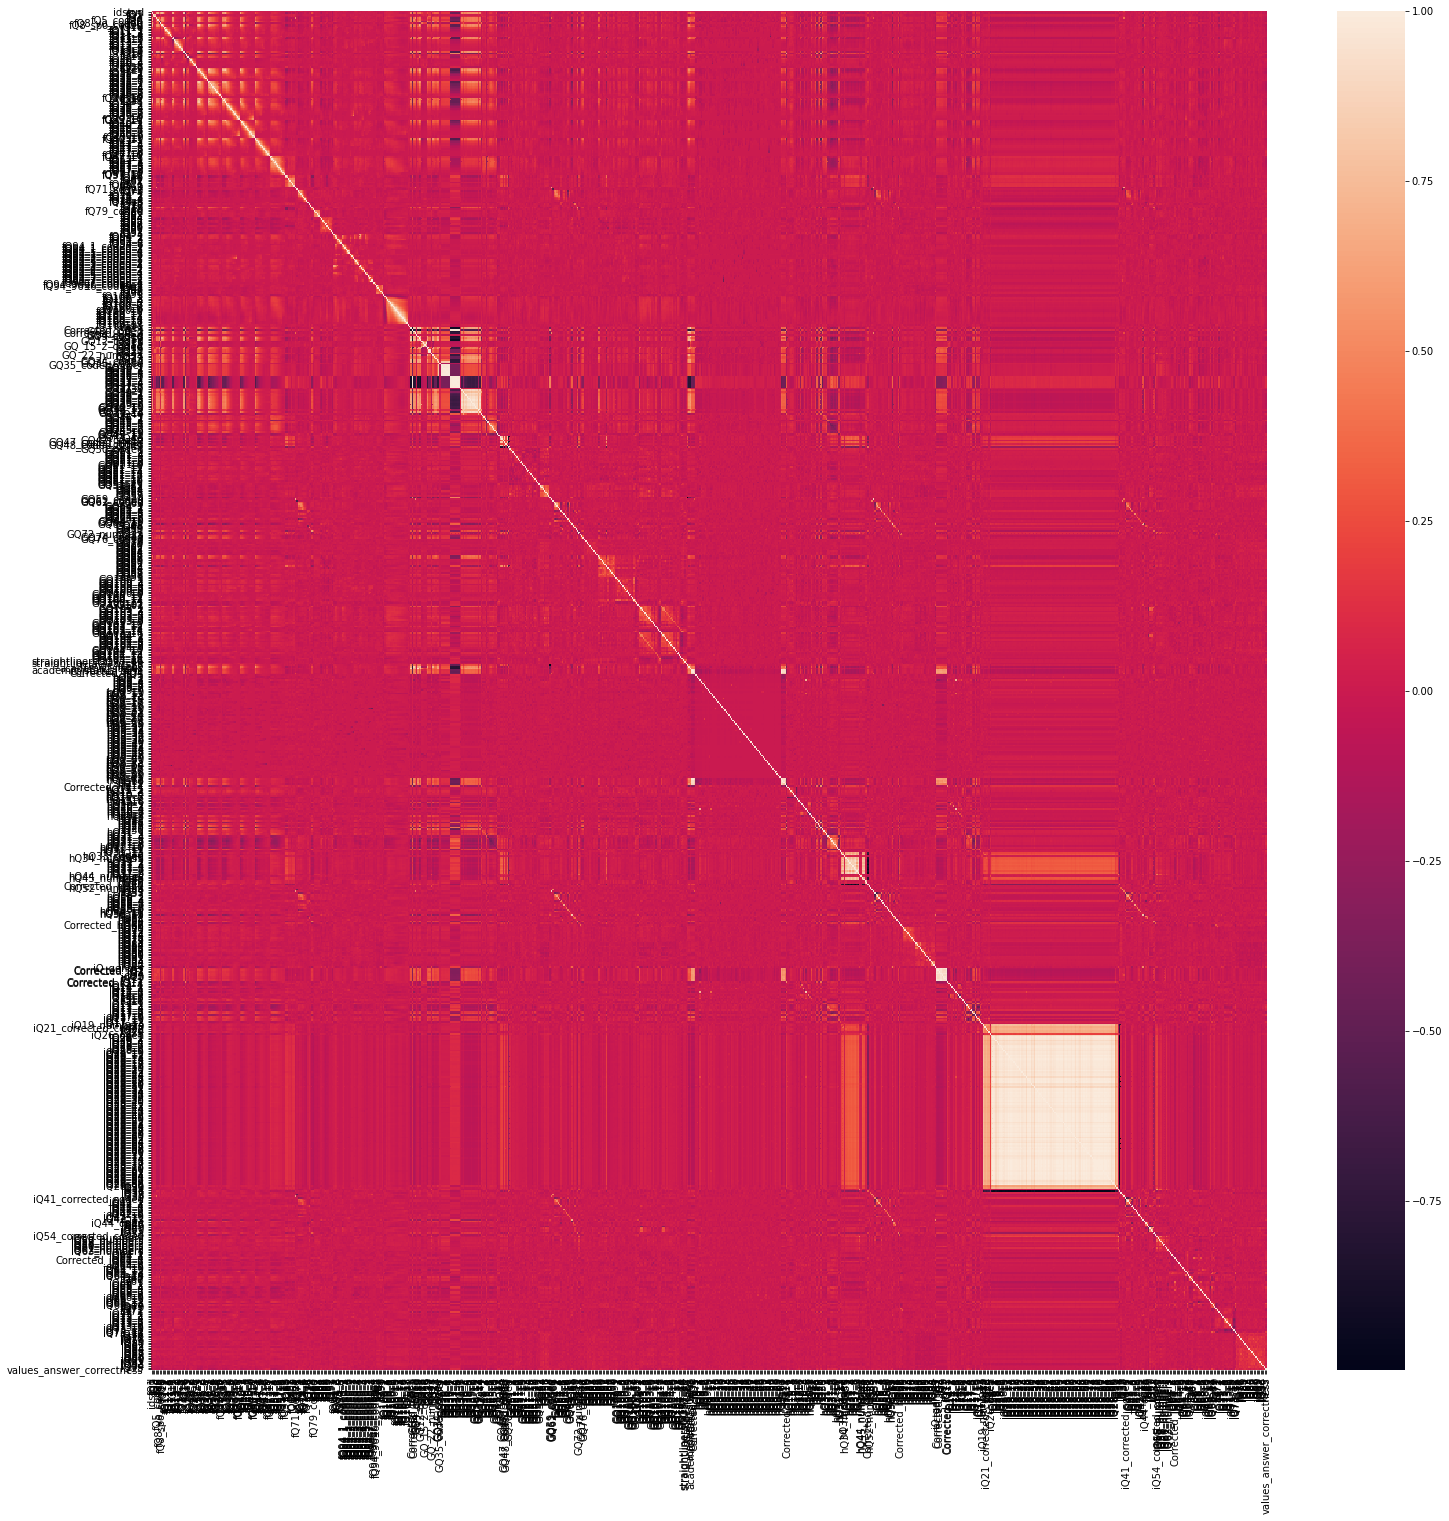

In [ ]:
corr = data.corr(method='spearman')
plt.figure(figsize = (25, 25))

ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, )

And let's scale the numerical features: 

In [ ]:
scaler = StandardScaler()
norm_data = data.copy()
norm_data[numeric_features] = scaler.fit_transform(norm_data[numeric_features])

# Binary Encoding

In [24]:
categorical_features = [c for c in data.columns if c not in numeric_features]
categorical_features.remove('iQ50')
categorical_features.remove('y')
categorical_features.remove('idstud')

In [25]:
binary_features = []
for c in data.columns:
  if c not in numeric_features:
    if len(data[c].unique()) > 2:
      binary_features.append(c)

In [26]:
binary_features.remove('iQ50')
binary_features.remove('idstud')
len(binary_features)

487

In [27]:
X_binary = data.drop(columns = ['iQ50', 'y'])
y = data['y']
ce_bin = ce.BinaryEncoder(cols = binary_features)
X_binary = ce_bin.fit_transform(X_binary, y)

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


# L-1 regularization

In [ ]:
X = data.drop(columns = ['iQ50', 'y'])
X_norm = norm_data.drop(columns = ['iQ50', 'y'])
#X_binary
y = data['y']

In [ ]:
logreg = LogisticRegression(C=5, penalty='l1', solver='saga', max_iter=10000).fit(X, y)
model = SelectFromModel(logreg, prefit=True)
columns_l1lr= model.get_support()
X_l1lr = model.transform(X)
X_l1lr.shape

In [28]:
lsvc = LinearSVC(C=0.04, penalty="l1", dual=False, max_iter=10000).fit(X_binary, y)
model = SelectFromModel(lsvc, prefit=True)
columns_l1svc = model.get_support()
X_l1svc = model.transform(X_binary)
X_l1svc.shape

Liblinear failed to converge, increase the number of iterations.


(2219, 316)

In [29]:
be_data = pd.DataFrame(X_l1svc, columns=X_binary.columns[columns_l1svc])
be_data

fQ2_1  fQ2_2  fQ3_1  fQ5_coded_6  ...  iQ93_2  iQ94_1  iQ94_2  iQ95_1
0       0.0    0.0    0.0          0.0  ...     0.0     0.0     0.0     0.0
1       0.0    1.0    0.0          0.0  ...     1.0     0.0     1.0     0.0
2       0.0    1.0    0.0          1.0  ...     0.0     0.0     0.0     0.0
3       1.0    0.0    0.0          0.0  ...     1.0     0.0     1.0     0.0
4       1.0    0.0    0.0          0.0  ...     1.0     0.0     0.0     0.0
...     ...    ...    ...          ...  ...     ...     ...     ...     ...
2214    1.0    0.0    0.0          1.0  ...     1.0     1.0     1.0     0.0
2215    0.0    1.0    0.0          0.0  ...     1.0     1.0     1.0     0.0
2216    0.0    1.0    0.0          1.0  ...     1.0     0.0     0.0     0.0
2217    1.0    0.0    0.0          0.0  ...     1.0     0.0     0.0     0.0
2218    0.0    1.0    1.0          1.0  ...     0.0     1.0     0.0     0.0

[2219 rows x 316 columns]

# Manual Variable Selection

In [ ]:
selected_X = X.loc[:, columns_l1svc]
col = selected_X.columns

In [ ]:
manual = [c for c in col if 'iQ68_' in c]
manual = manual + [c for c in col if 'hQ9_' in c]
manual = manual + [c for c in col if 'hQ37_' in c]
manual = manual + [c for c in col if 'hQ58_' in c]
manual = manual + [c for c in col if 'GQ34_' in c]
manual = manual + [c for c in col if 'GQ35_' in c]
manual = manual + [c for c in col if 'GQ37_' in c]
manual = manual + [c for c in col if 'GQ64_' in c]
manual = manual + [c for c in col if 'GQ103_' in c]
manual = manual + [c for c in col if 'GQ104_' in c]
manual = manual + [c for c in col if 'fQ74_' in c]
manual = manual + ['iQ_gender', 'Corrected_iQ2', 'iQ3', 'iQ5', 'iQ11', 'iQ15', 'iQ22', 'iQ25', 'iQ31', 'iQ37',
                   'Corrected_iQ12',  'Corrected_iQ13', 'iQ19_numbers', 'iQ26_open', 'iQ41_corrected_coded', 'iQ43', 'iQ46', 'iQ47', 'iQ51', 'iQ52', 'iQ53',
                   'iQ54_corrected_coded', 'iQ60_numbers']

manual = manual + ['hQ16', 'hQ21', 'hQ32', 'hQ35', 'hQ46', 'hQ53', 'hQ57', 'hQ65', 'hQ32',
                   'hQ74', 'hQ75', 'hQ76', 'hQ77', 'Corrected_hQ50', 'hQ33_coded']

manual = manual + ['Corrected_GQ_3', 'GQ10', 'GQ12_coded', 'GQ10', 'GQ27',
                   'GQ33', 'GQ38', 'GQ49', 'GQ50_coded', 'GQ59_coded', 'GQ63', 'GQ68', 'GQ71', 'GQ73', 'GQ79', 'GQ83', 'GQ85',
                   'GQ93', 'GQ97', 'academic_status_form']

manual = manual + ['fQ2', 'fQ3', 'fQ6', 'fQ14', 'fQ2', 'fQ19', 'fQ29', 'fQ58', 'fQ62', 'fQ66_1', 'fQ73', 'fQ75', 'fQ76',
                   'fQ78', 'fQ79_coded', 'fQ80']

out = ['GQ19_coded', 'fQ9', 'iQ45_numbers', 'GQ22_numbers', 'GQ15_2_coded', 'hQ51', 'Corrected_iQ1', 'GQ16', 'hQ47',
       'iQ55_numbers', 'hQ73', 'iQ4', 'fQ1', 'hQ68', 'GQ46', 'Corrected_GQ_1', 'iQ57_numbers', 'iQ34', 'iQ62_numbers', 'iQ50', 'iQ56_numbers', 'GQ69', 'fQ61',
       'fQ81', 'hQ71', 'hQ70', 'fQ82', 'iQ36', 'iQ10', 'hQ34_numbers', 'iQ70', 'hQ72', 'GQ72_numbers', 'iQ61_numbers', 'fQ18', 'hQ78', 'iQ20', 'GQ11', 'GQ13',
       'iQ58_numbers', 'iQ71', 'hQ69', 'fQ83', 'iQ59_numbers', 'iQ63_numbers']


In [ ]:
manual_data = selected_X[manual]
manual_data

iQ68_4  iQ68_5  hQ9_11  hQ37_2  ...  fQ76  fQ78  fQ79_coded  fQ80
0          1       1       1       0  ...     1     5           7     1
1          0       1       1       1  ...     2     2           1     0
2          1       1       1      -1  ...     1     2          10     1
3          0       0       1      -1  ...     0     5           7     0
4          0       1       1      -1  ...     2     5          10     0
...      ...     ...     ...     ...  ...   ...   ...         ...   ...
2214       0       1       1       0  ...     0     5           7     2
2215       1       1       1       0  ...     2     5           0     2
2216       1       1       1      -1  ...     1     5          10     0
2217       0       0       1      -1  ...     2     5           7     2
2218       1       0       1       1  ...     1     5           0     2

[2219 rows x 108 columns]

In [ ]:
manual = manual_data.columns.unique()
manual_data = selected_X[manual]
manual_data.shape

(2219, 105)

# Predicting models

In [ ]:
X_n_l1svc # with normalization 349
X_b_l1svc # with binary encoding 316
X_l1svc # 334
manual_data # manually chosen

Logistic Regression:

In [30]:
X_train, X_test, y_train, y_test = train_test_split(be_data, y, test_size=0.3, random_state=42)

In [31]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

logreg_predict = logreg.predict(X_test)

logreg_cv_score = cross_val_score(logreg, be_data, y, cv=10)

print(logreg_cv_score)

print("Mean Accuracy: ", logreg_cv_score.mean())

[0.78378378 0.77027027 0.76576577 0.77477477 0.79279279 0.77927928
 0.83783784 0.77477477 0.79279279 0.74660633]
Mean Accuracy:  0.7818678406913702


LightGBM:

In [44]:
lgbm = LGBMClassifier(max_depth=2)
lgbm.fit(X_train, y_train)
lgbm_predict = lgbm.predict(X_test)

lgbm_cv_score = cross_val_score(lgbm, X_l1svc, y, cv=10)

print(lgbm_cv_score)
print('\n')
print("Mean accuracy", lgbm_cv_score.mean())

[0.78021978 0.75824176 0.77655678 0.79120879 0.76556777 0.77205882
 0.77573529 0.77205882 0.77573529 0.75735294]


Mean accuracy 0.7724736048265459


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.81      0.97      0.88       521
           2       0.29      0.08      0.12        26
           3       0.60      0.89      0.72        82
           4       0.70      0.26      0.38       152
           5       0.23      0.09      0.13        33

    accuracy                           0.76       818
   macro avg       0.60      0.42      0.44       818
weighted avg       0.73      0.76      0.72       818



XGBoost:


In [64]:
xgbc = XGBClassifier(max_depth=4, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, n_estimators=150, random_state=0)
xgbc.fit(X_train, y_train)
xgbc_predict = xgbc.predict(X_test)

xgbc_cv_score = cross_val_score(xgbc, be_data, y, cv=10)

print(xgbc_cv_score)
print('\n')
print("Mean accuracy", xgbc_cv_score.mean())

[0.75091575 0.76556777 0.78754579 0.78388278 0.72893773 0.8125
 0.79044118 0.76102941 0.78676471 0.73529412]


Mean accuracy 0.7702879228614523


Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.81      0.97      0.88       521
           2       0.18      0.08      0.11        26
           3       0.61      0.79      0.69        82
           4       0.69      0.24      0.36       152
           5       0.33      0.24      0.28        33

    accuracy                           0.75       818
   macro avg       0.44      0.39      0.39       818
weighted avg       0.72      0.75      0.71       818



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


GradientBoosting (from sklearn library):


In [ ]:
clf = GradientBoostingClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
clf_predict = clf.predict(X_test)

clf_cv_score = cross_val_score(clf, manual_data, y, cv=10)

print(clf_cv_score)
print('\n')
print("Mean accuracy", clf_cv_score.mean())

[0.69369369 0.6981982  0.6981982  0.72522523 0.68918919 0.69369369
 0.68918919 0.67567568 0.74324324 0.66968326]


Mean accuracy 0.6975989564224858


Classification Report
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       338
           1       0.72      0.70      0.71       328

    accuracy                           0.71       666
   macro avg       0.71      0.71      0.71       666
weighted avg       0.71      0.71      0.71       666



Random Forest:

In [ ]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)

rfc_cv_score = cross_val_score(rfc, manual_data, y, cv=10)

print(rfc_cv_score)
print('\n')
print("Mean accuracy", rfc_cv_score.mean())

[0.67567568 0.73423423 0.70720721 0.67567568 0.74774775 0.68018018
 0.72522523 0.68468468 0.7027027  0.6561086 ]


Mean accuracy 0.6989441930618401


Classification Report
              precision    recall  f1-score   support

           0       0.70      0.73      0.71       338
           1       0.71      0.68      0.69       328

    accuracy                           0.70       666
   macro avg       0.70      0.70      0.70       666
weighted avg       0.70      0.70      0.70       666



Decision Tree:

In [ ]:
dt = DecisionTreeClassifier(random_state=42, max_depth=4)
dt.fit(X_train, y_train)
dt_predict = dt.predict(X_test)

dt_cv_score = cross_val_score(dt, manual_data, y, cv=10)

print(dt_cv_score)
print('\n')
print("Mean accuracy", dt_cv_score.mean())

[0.61261261 0.62612613 0.62612613 0.68018018 0.64864865 0.65315315
 0.67117117 0.5990991  0.70720721 0.59728507]


Mean accuracy 0.6421609392197627


Classification Report
              precision    recall  f1-score   support

           0       0.69      0.62      0.65       338
           1       0.64      0.71      0.67       328

    accuracy                           0.66       666
   macro avg       0.66      0.66      0.66       666
weighted avg       0.66      0.66      0.66       666



In [48]:
from sklearn.model_selection import GridSearchCV

xgb_grid = {"max_depth" : np.linspace(3.0, 9.0, num=4),
"min_child_weight": range (1,6,2)
"eta" : np.linspace(0.01, 0.3, num=10),
"subsample" : np.linspace(0.5, 1.0, num=3),
"colsample_bytree" : np.linspace(0.5, 1.0, num=3),
}

clf = GridSearchCV(xgbc, param_grid = xgb_grid, cv = 3, n_jobs = -1)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, eta=0.1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='multi:softprob',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     s...
             param_grid={'base_score': [0.5], 'colsample_bylevel': [0.4],
                         'colsample_bytree': [0.5], 'gamma': [0],
                         'learning_rate': [0.2], 'max_delta_step': [0],
                         'max_depth': [6], 'min_child_weight': [1],
                         'n_estimato

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, max_depth=4, subsample=0.8, colsample_bytree=0.8, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)

In [57]:
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([18.5435626 , 18.46738524, 18.60220127, 27.19640827, 26.76025443,
         26.4091496 , 34.13131933, 32.38963909, 31.35920367, 37.78335609,
         34.79694037, 30.28422203]),
  'mean_score_time': array([0.04175196, 0.03726759, 0.03331337, 0.0403204 , 0.04291706,
         0.04184422, 0.04806995, 0.04708905, 0.04463921, 0.04675817,
         0.04458032, 0.03056345]),
  'mean_test_score': array([0.76823322, 0.76980253, 0.76560306, 0.76612524, 0.76613074,
         0.76298113, 0.76087727, 0.76454632, 0.76350469, 0.76140221,
         0.76349507, 0.76717374]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5, 1, 3, 5],
               mask=[False, False, False, False, False, False, False, Fa

In [51]:
xgbc_predict = clf.predict(X_test)
xgbc_cv_score = cross_val_score(clf, X_l1svc, y, cv=10)

print(xgbc_cv_score)
print('\n')
print("Mean accuracy", xgbc_cv_score.mean())

[0.75824176 0.78388278 0.75824176 0.78754579 0.75091575 0.78308824
 0.77205882 0.75735294 0.76470588 0.75      ]


Mean accuracy 0.7666033721180779


Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.82      0.97      0.89       521
           2       0.22      0.08      0.11        26
           3       0.62      0.84      0.71        82
           4       0.75      0.28      0.40       152
           5       0.30      0.18      0.23        33

    accuracy                           0.77       818
   macro avg       0.45      0.39      0.39       818
weighted avg       0.74      0.77      0.72       818



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Results interpretation for iQ49:

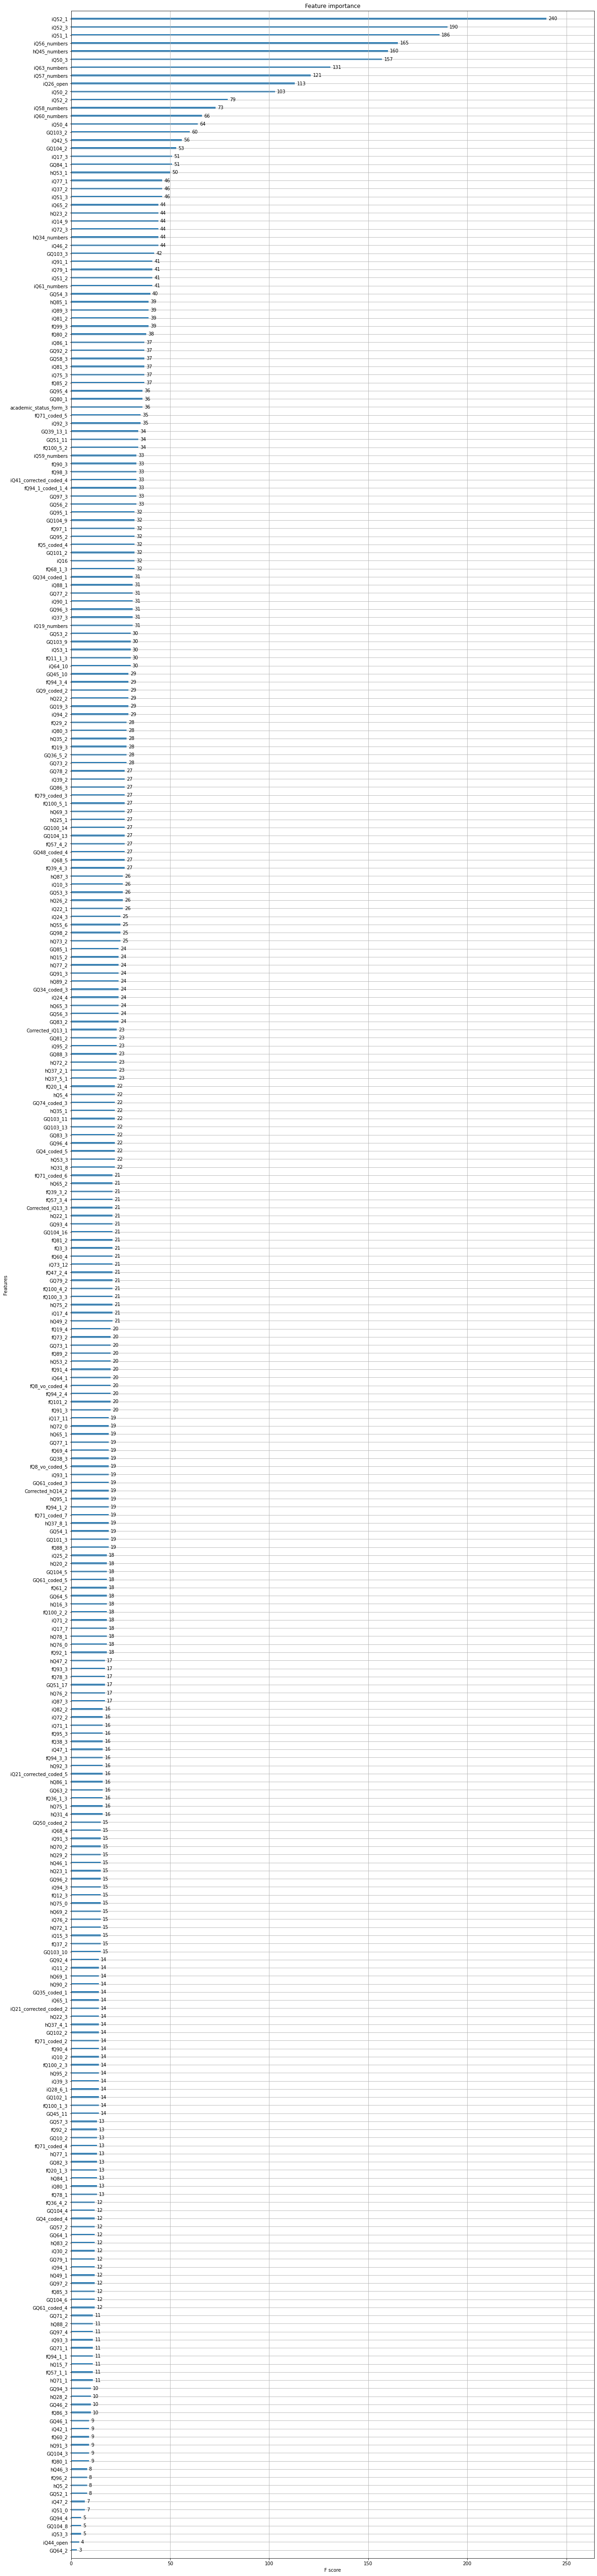

In [118]:
from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (20,100)
plot_importance(xgbc)


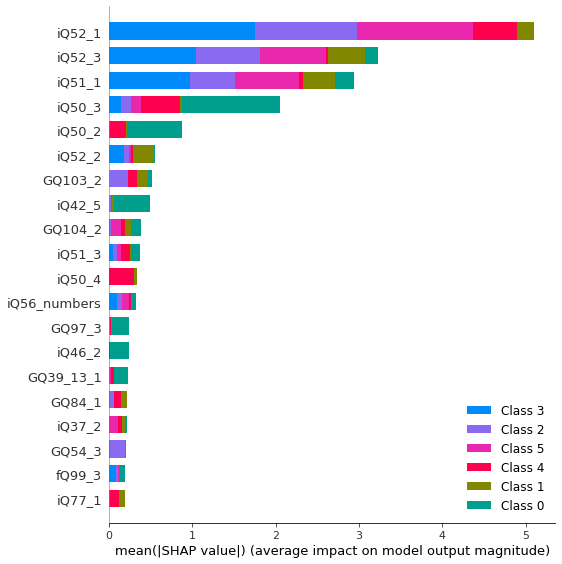

In [65]:
shap_test = shap.TreeExplainer(xgbc).shap_values(be_data)
shap.summary_plot(shap_test, be_data, max_display=25)

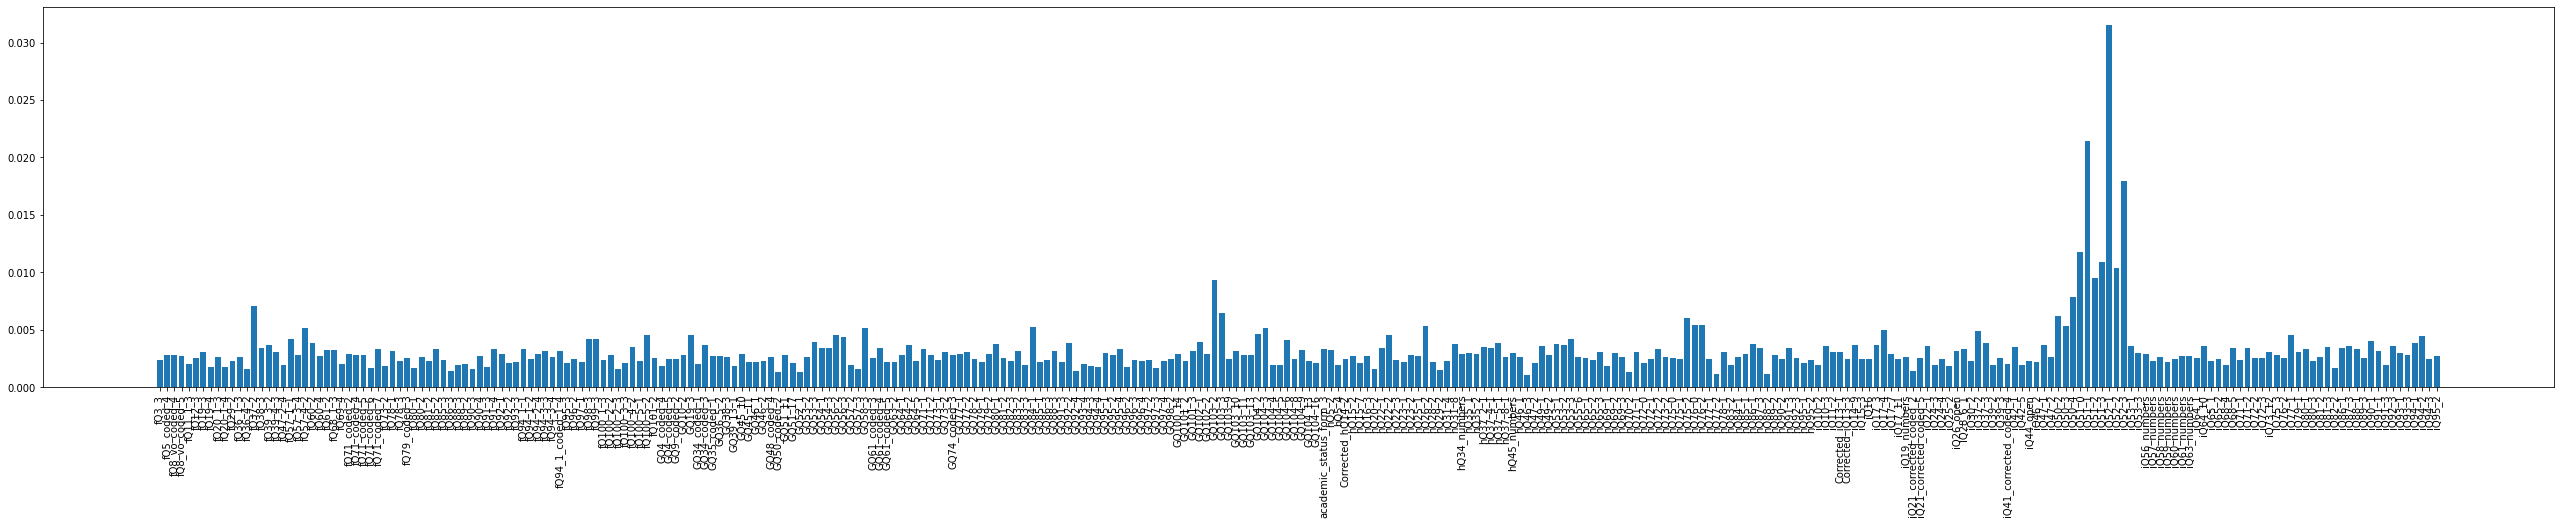

In [125]:
plt.bar(be_data.columns, xgbc.feature_importances_)
plt.gcf().set_size_inches(45, 7, forward = True)
plt.xticks(rotation = 90)
plt.show()

In [36]:
shap_test = shap.TreeExplainer(lgbm).shap_values(be_data)
shap.summary_plot(shap_test, be_data, max_display=25)

NameError: ignored

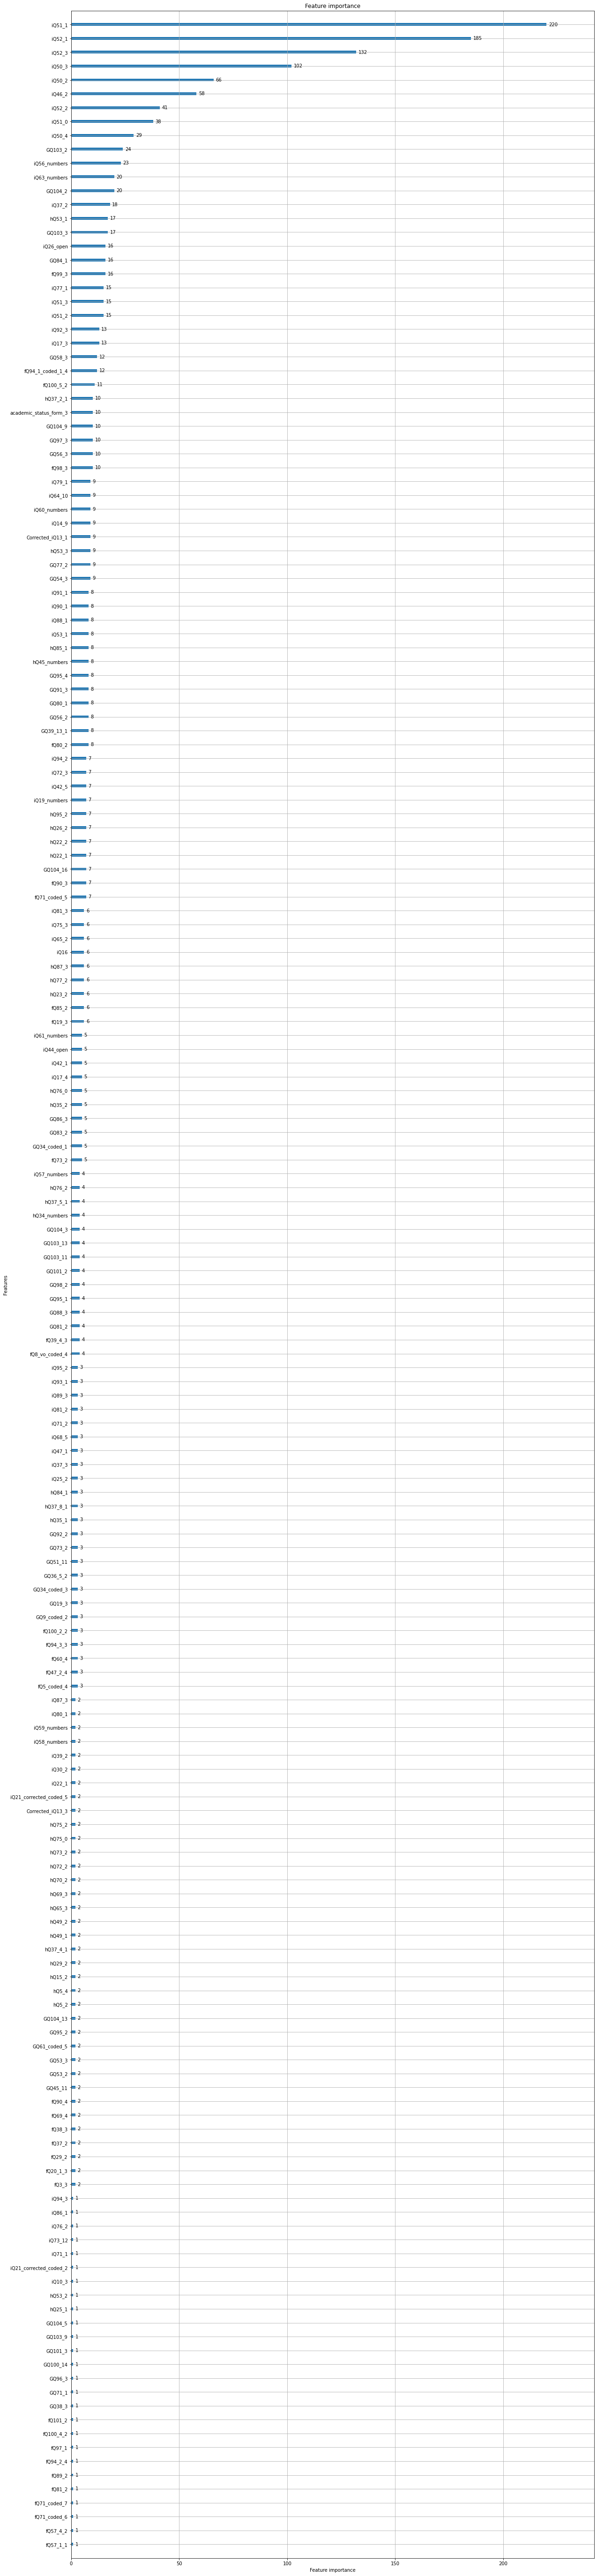

In [128]:
from lightgbm import plot_importance
plt.rcParams["figure.figsize"] = (20,100)
plot_importance(lgbm)

# Results interpretation for iQ50:

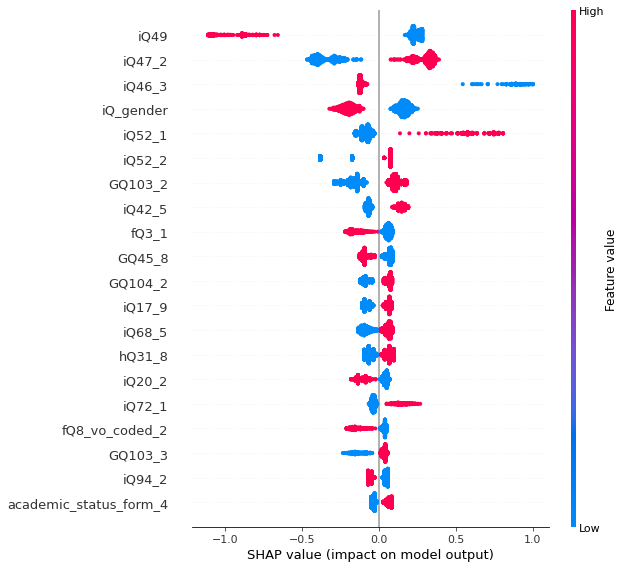

In [33]:
shap_test = shap.TreeExplainer(xgbc).shap_values(be_data)
shap.summary_plot(shap_test, be_data, max_display=20)

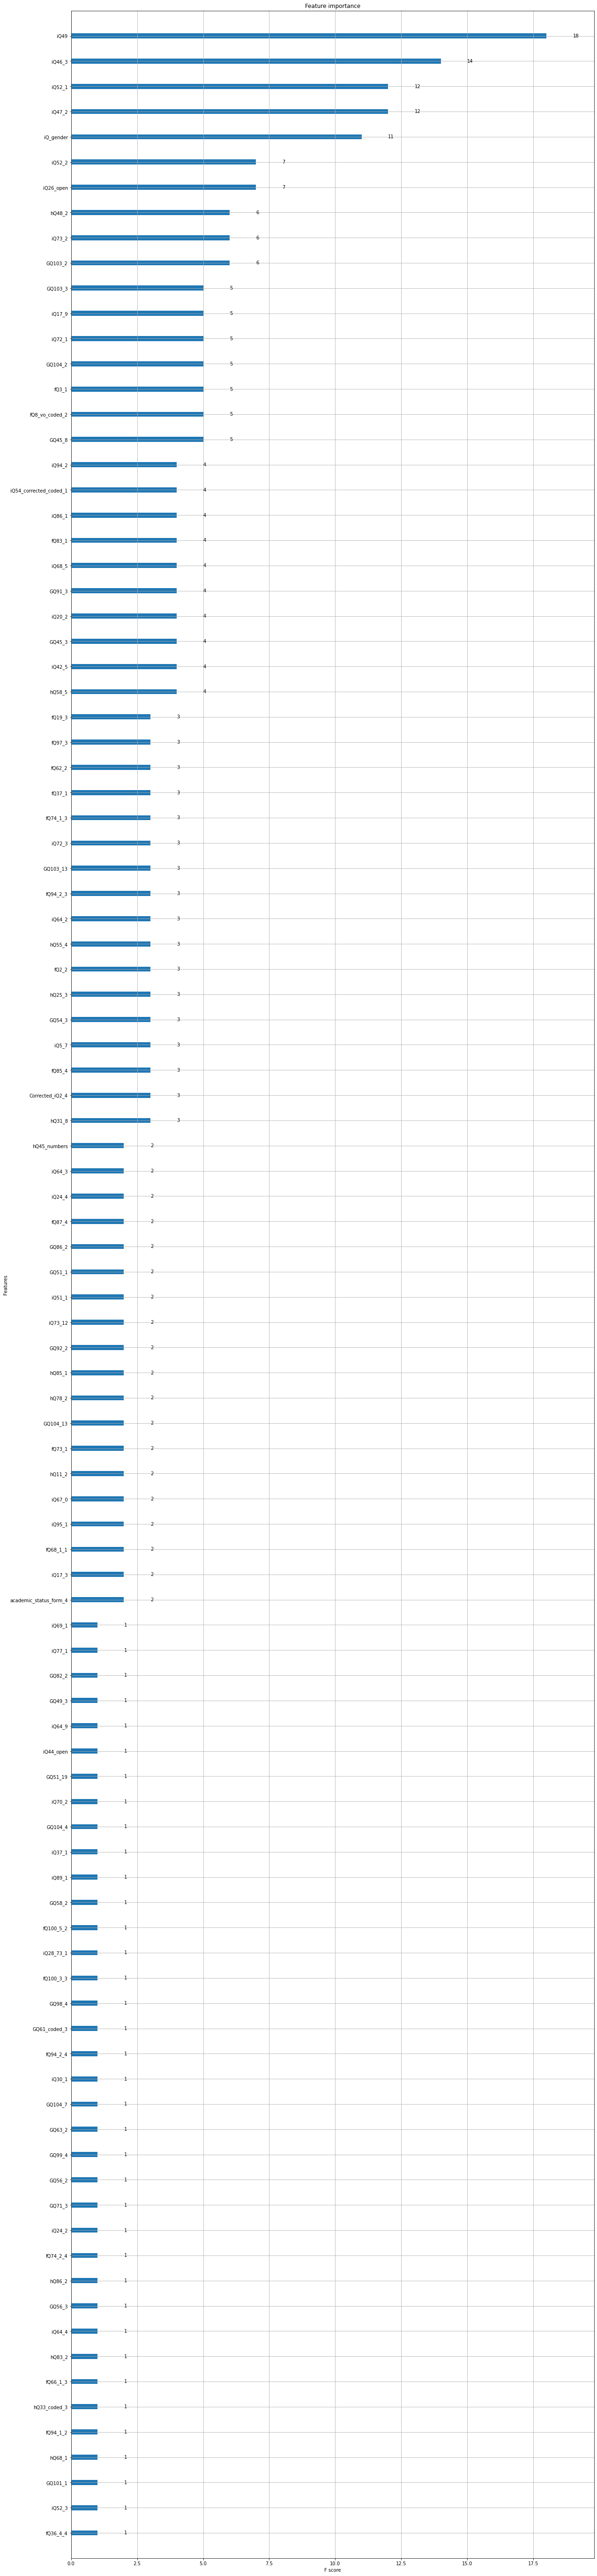

In [163]:
from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (20,100)
plot_importance(xgbc)


The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


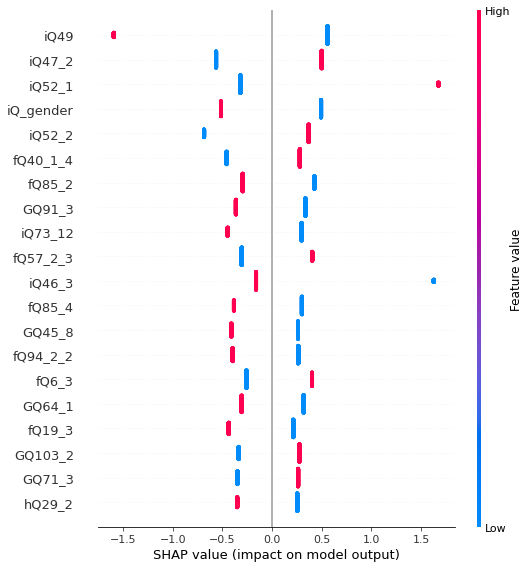

In [38]:
explainer = shap.LinearExplainer(logreg, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Feature: fQ2_1, Score: 0.20633
Feature: fQ2_2, Score: -0.28034
Feature: fQ3_1, Score: -0.28464
Feature: fQ5_coded_6, Score: 0.24491
Feature: fQ5_coded_7, Score: -0.37736
Feature: fQ6_3, Score: 0.66021
Feature: fQ8_vo_coded_2, Score: -0.38375
Feature: fQ8_vo_coded_3, Score: 0.00394
Feature: fQ8_spo_coded_3, Score: -0.36627
Feature: fQ10_2, Score: 0.32136
Feature: fQ12_2, Score: -0.13570
Feature: fQ13_1_4, Score: -0.72341
Feature: fQ19_2, Score: 0.08765
Feature: fQ19_3, Score: -0.65038
Feature: fQ19_4, Score: 0.45420
Feature: fQ29_3, Score: -0.04978
Feature: fQ35_2_3, Score: 0.06910
Feature: fQ36_4_4, Score: 0.34350
Feature: fQ37_1, Score: 0.34216
Feature: fQ38_1, Score: 0.21830
Feature: fQ39_2_3, Score: 0.10635
Feature: fQ39_3_2, Score: -0.15710
Feature: fQ39_4_3, Score: -0.35583
Feature: fQ40_1_4, Score: 0.73824
Feature: fQ40_2_2, Score: -0.06479
Feature: fQ40_2_4, Score: 0.24708
Feature: fQ47_2_3, Score: -0.42125
Feature: fQ57_1_2, Score: -0.36368
Feature: fQ57_1_4, Score: -0.30663
Fe

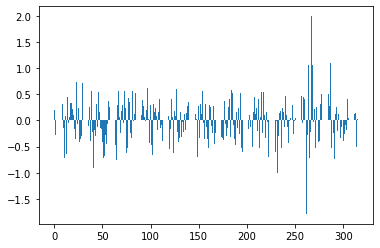

In [43]:
importance = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (be_data.columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()